# Author : Aditya Gupta

# Data Science and Business Analytics Internship

# GRIP THE SPARK FOUNDATION

# ###GRIPDEC'20

## Objective 1 : As a business manager, try to find out the weak areas where you can work to make more profit. 

## Objective 2 : What all business problems you can derive by exploring the data? 

In [1]:
# Importing all the Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# import plotly.express as px
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots
# from pywaffle import waffle

In [2]:
# Loading the dataset
store = pd.read_csv('SampleSuperstore.csv')
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
store.shape # There are 13 columns and 9994 datapoints/rows.

(9994, 13)

In [4]:
store.info() # There are three datatypes i.e. object datatype, integer datatype and float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
# To sort out different datatypes  
list1 = []
list2 = []
list3 = []
list4 = []
for i in store:
    if store[i].dtype == ('object'):
        list1.append(i)
    if store[i].dtype == ('int64'):
        list2.append(i)
    if store[i].dtype == ('float64'):
        list3.append(i)
    else:
        list4.append(i)
print(list1)
print(list2)
print(list3)
print(list4)

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
['Postal Code', 'Quantity']
['Sales', 'Discount', 'Profit']
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Quantity']


In [6]:
# 5 point summary of the dataset.
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


*Assumptions*
1. By Sales in the sales columns I have inferred it is Selling Price (SP).
2. The profit is in terms of extra money made i.e. Profit = Selling Price(SP) - Cost Price(CP).

*Insights*

The minimum and maximum sales made in the superstore was that of 0 and 22638 respectively.

The minimum and maximum quantity sold in the superstore was that of 1 and 14 units respectively.

The minimum and maximum discount given in the superstore was that of 0 and 0.80 respectively.

The minimum and maximum profit made in the superstore was that of -6600 (loss) and 8394 respectively.

In [7]:
# Categorical Columns
cat_col = store.select_dtypes(include = ['object']).columns
store[cat_col].head(2)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs


In [8]:
# Numerical Columns
num_col = store.select_dtypes(exclude = ['object']).columns
store[num_col].head(2)

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.96,2,0.0,41.9136
1,42420,731.94,3,0.0,219.5820


In [9]:
store['Ship Mode'].value_counts() # In Ship Mode, Standard Class is mostly used follwed by second class,first class and same day.

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [10]:
store['Segment'].value_counts() # In Segment, Consumer segemnt is mostly seen followed by corporate and home office. 

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [11]:
store['State'].value_counts() # State of California, New York, Texas, Pennsylvania and Washington is where most business taking place.

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

In [12]:
store['City'].value_counts() # Most of the consumers are from NY City, Los Angeles, Philadelphia, San Francisco and Seattle.

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Goldsboro          1
Margate            1
Conroe             1
Pensacola          1
Springdale         1
Name: City, Length: 531, dtype: int64

In [13]:
store['Region'].value_counts()  # Almost regions are have approx. equal amount of consumers for the superstore. 

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [14]:
store['Category'].value_counts() # Most of the consumers are for Office Supplies followed by furniture and technology.

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [15]:
store['Sub-Category'].value_counts() # Demand for binders, paper, furnishings, phones and storage is highest amongst the consumers.

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [16]:
store['Discount'].unique()

array([0.  , 0.45, 0.2 , 0.8 , 0.3 , 0.5 , 0.7 , 0.6 , 0.32, 0.1 , 0.4 ,
       0.15])

### Checking for Missing Values

In [17]:
store.isnull().sum() # There are no null values in any of the features.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [18]:
store.isnull().sum()[store.isnull().sum()!=0] # Another way for confirming, there are no null values in the dataset.

Series([], dtype: int64)

## Visualizations of the Dataset

In [19]:
# To sort out different datatypes  
list1 = []
list2 = []
list3 = []
list4 = []
for i in store:
    if store[i].dtype == ('object'):
        list1.append(i)
    if store[i].dtype == ('int64'):
        list2.append(i)
    if store[i].dtype == ('float64'):
        list3.append(i)
    else:
        list4.append(i)
print(list1)
print(list2)
print(list3)
print(list4)

['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
['Postal Code', 'Quantity']
['Sales', 'Discount', 'Profit']
['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Quantity']


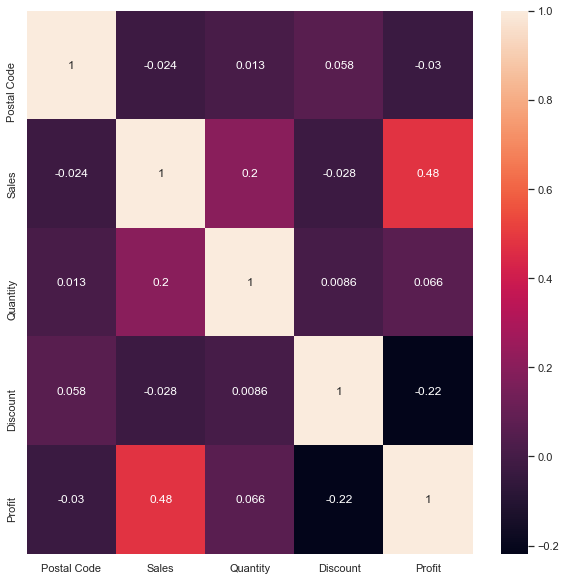

In [20]:
# Creating the heatmap
plt.figure(figsize = (10,10))
cor = store.corr()
sns.heatmap(cor, annot = True)
plt.show()

In [21]:
#Correlation with output variable
cor_target = abs(cor["Profit"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features
# The highly correlated features are Sales, Discount and Profit.

Sales       0.479064
Discount    0.219487
Profit      1.000000
Name: Profit, dtype: float64

# Univariate Analysis

### Catagorical Columns

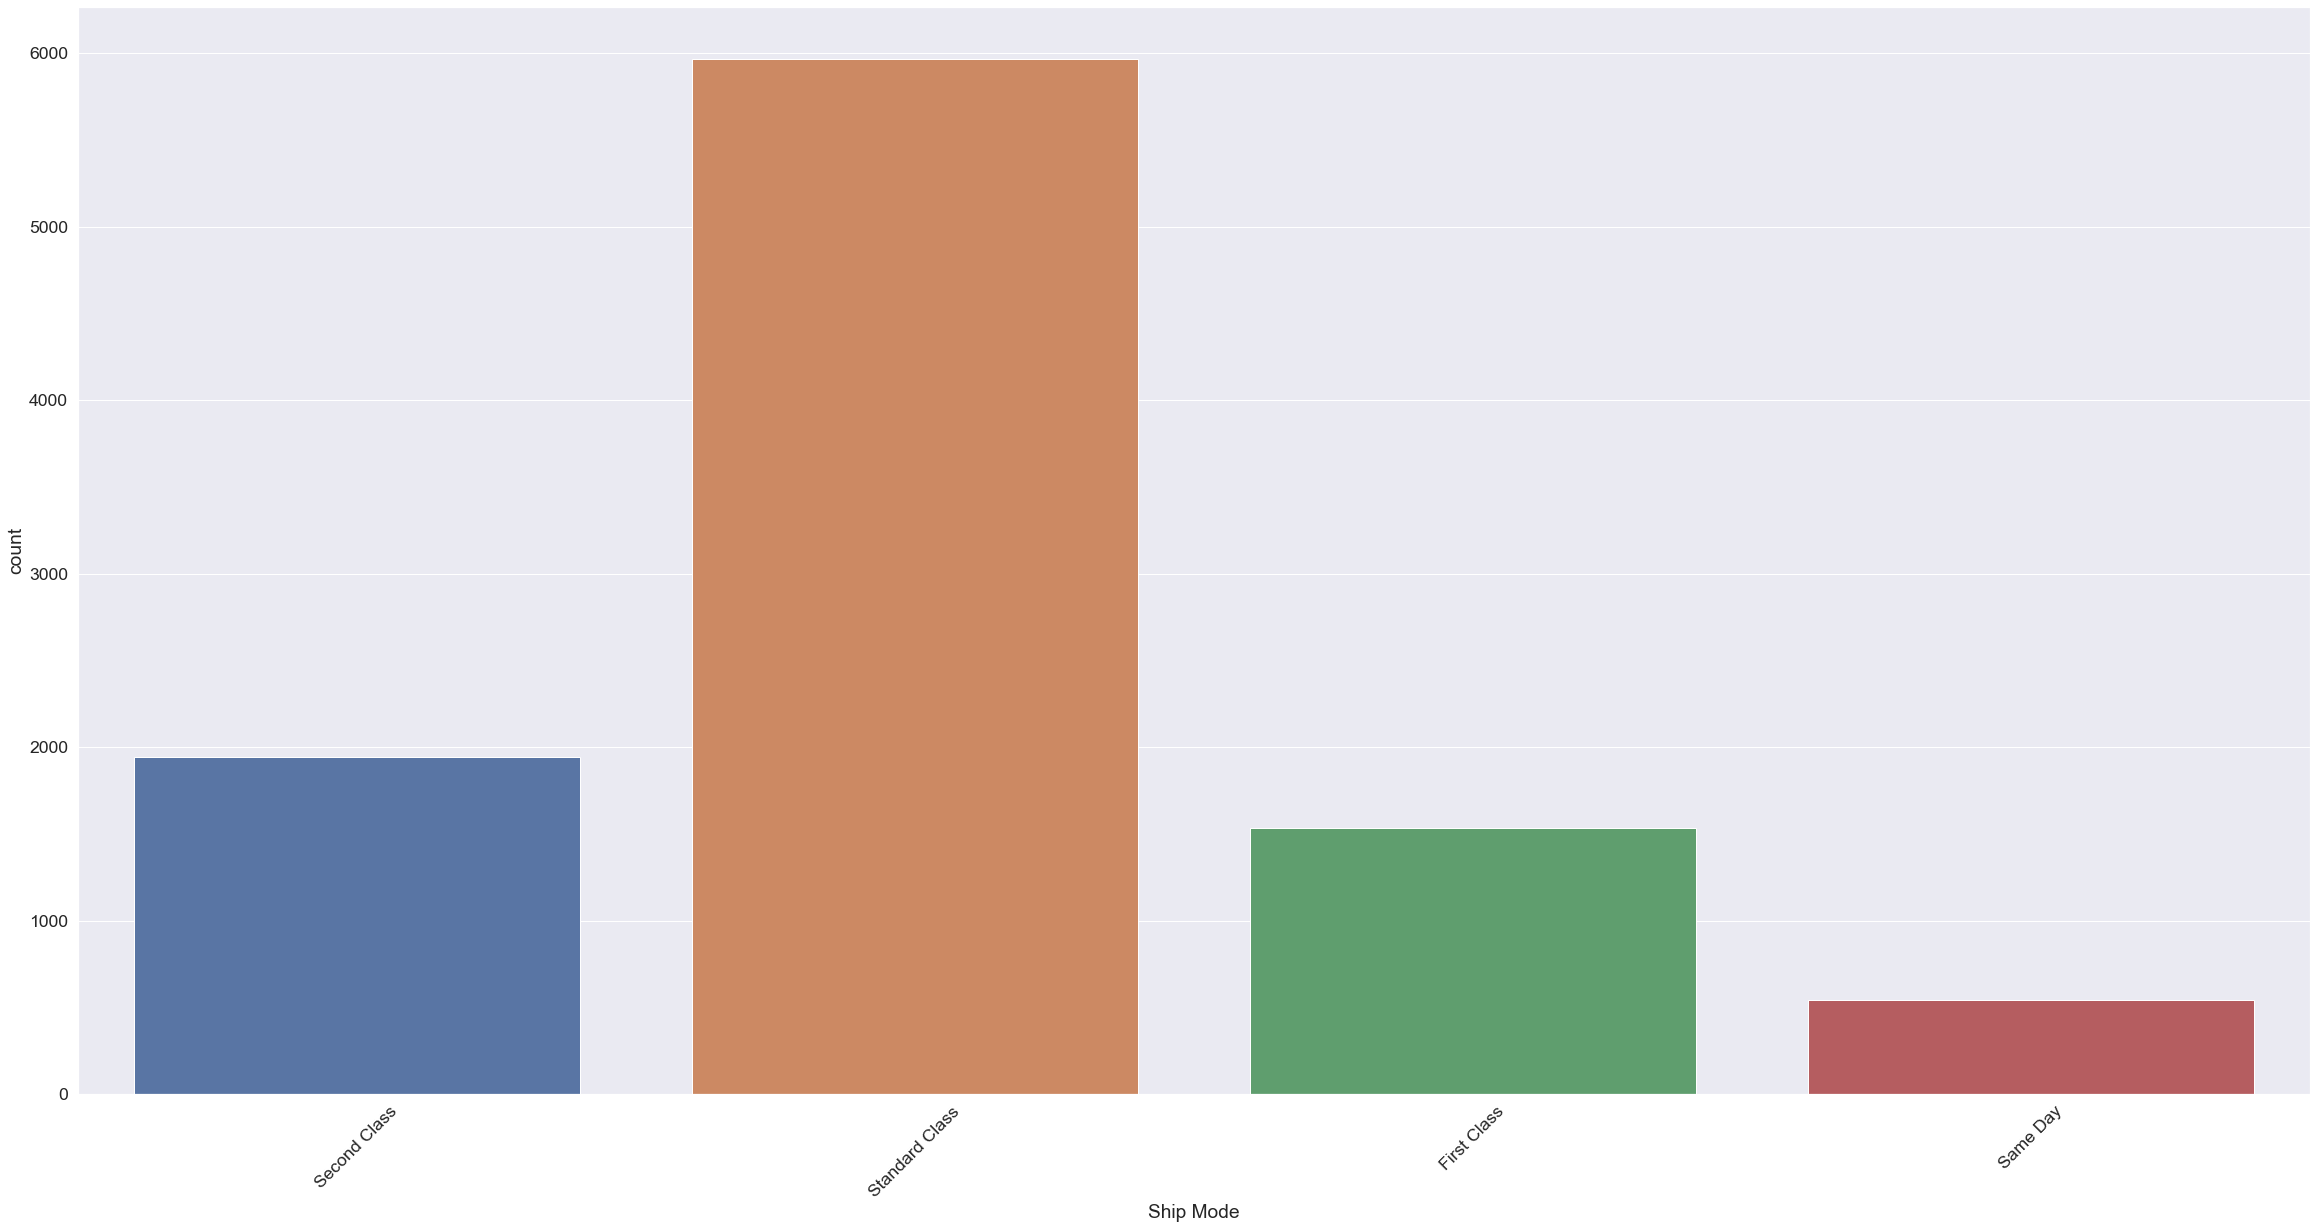

In [22]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'Ship Mode', data=store)
plt.xticks(rotation = 45)
plt.show() # Standard Class of Ship Mode is mostly preferred by the consumers.

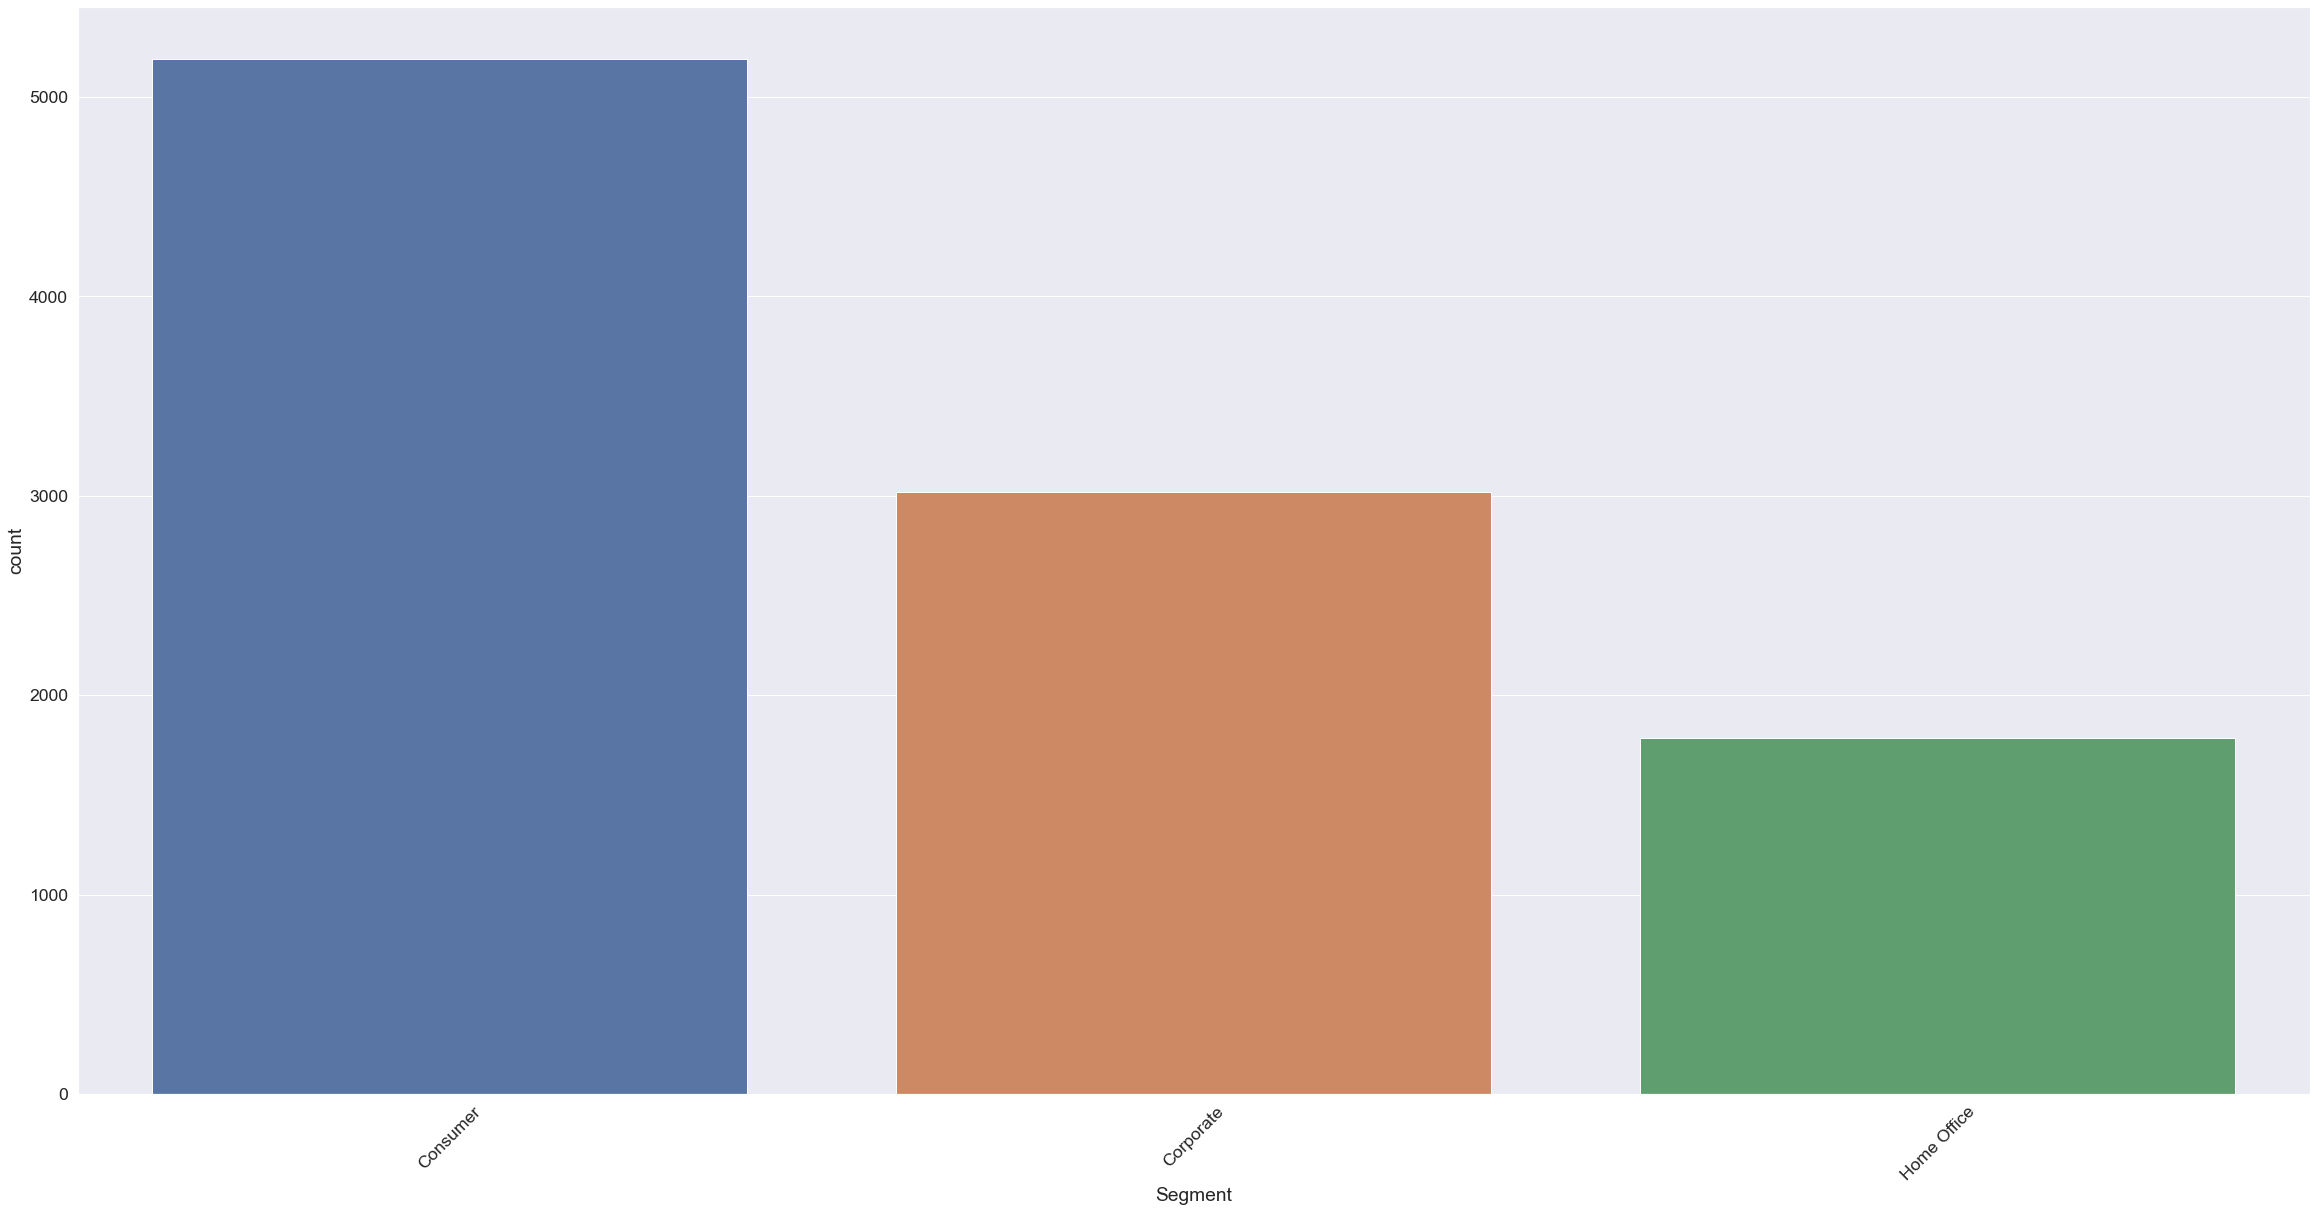

In [23]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'Segment', data=store)
plt.xticks(rotation = 45)
plt.show() # Consumer segment is in higher demand for personal use followed by Corporate and Home Office Segment. 

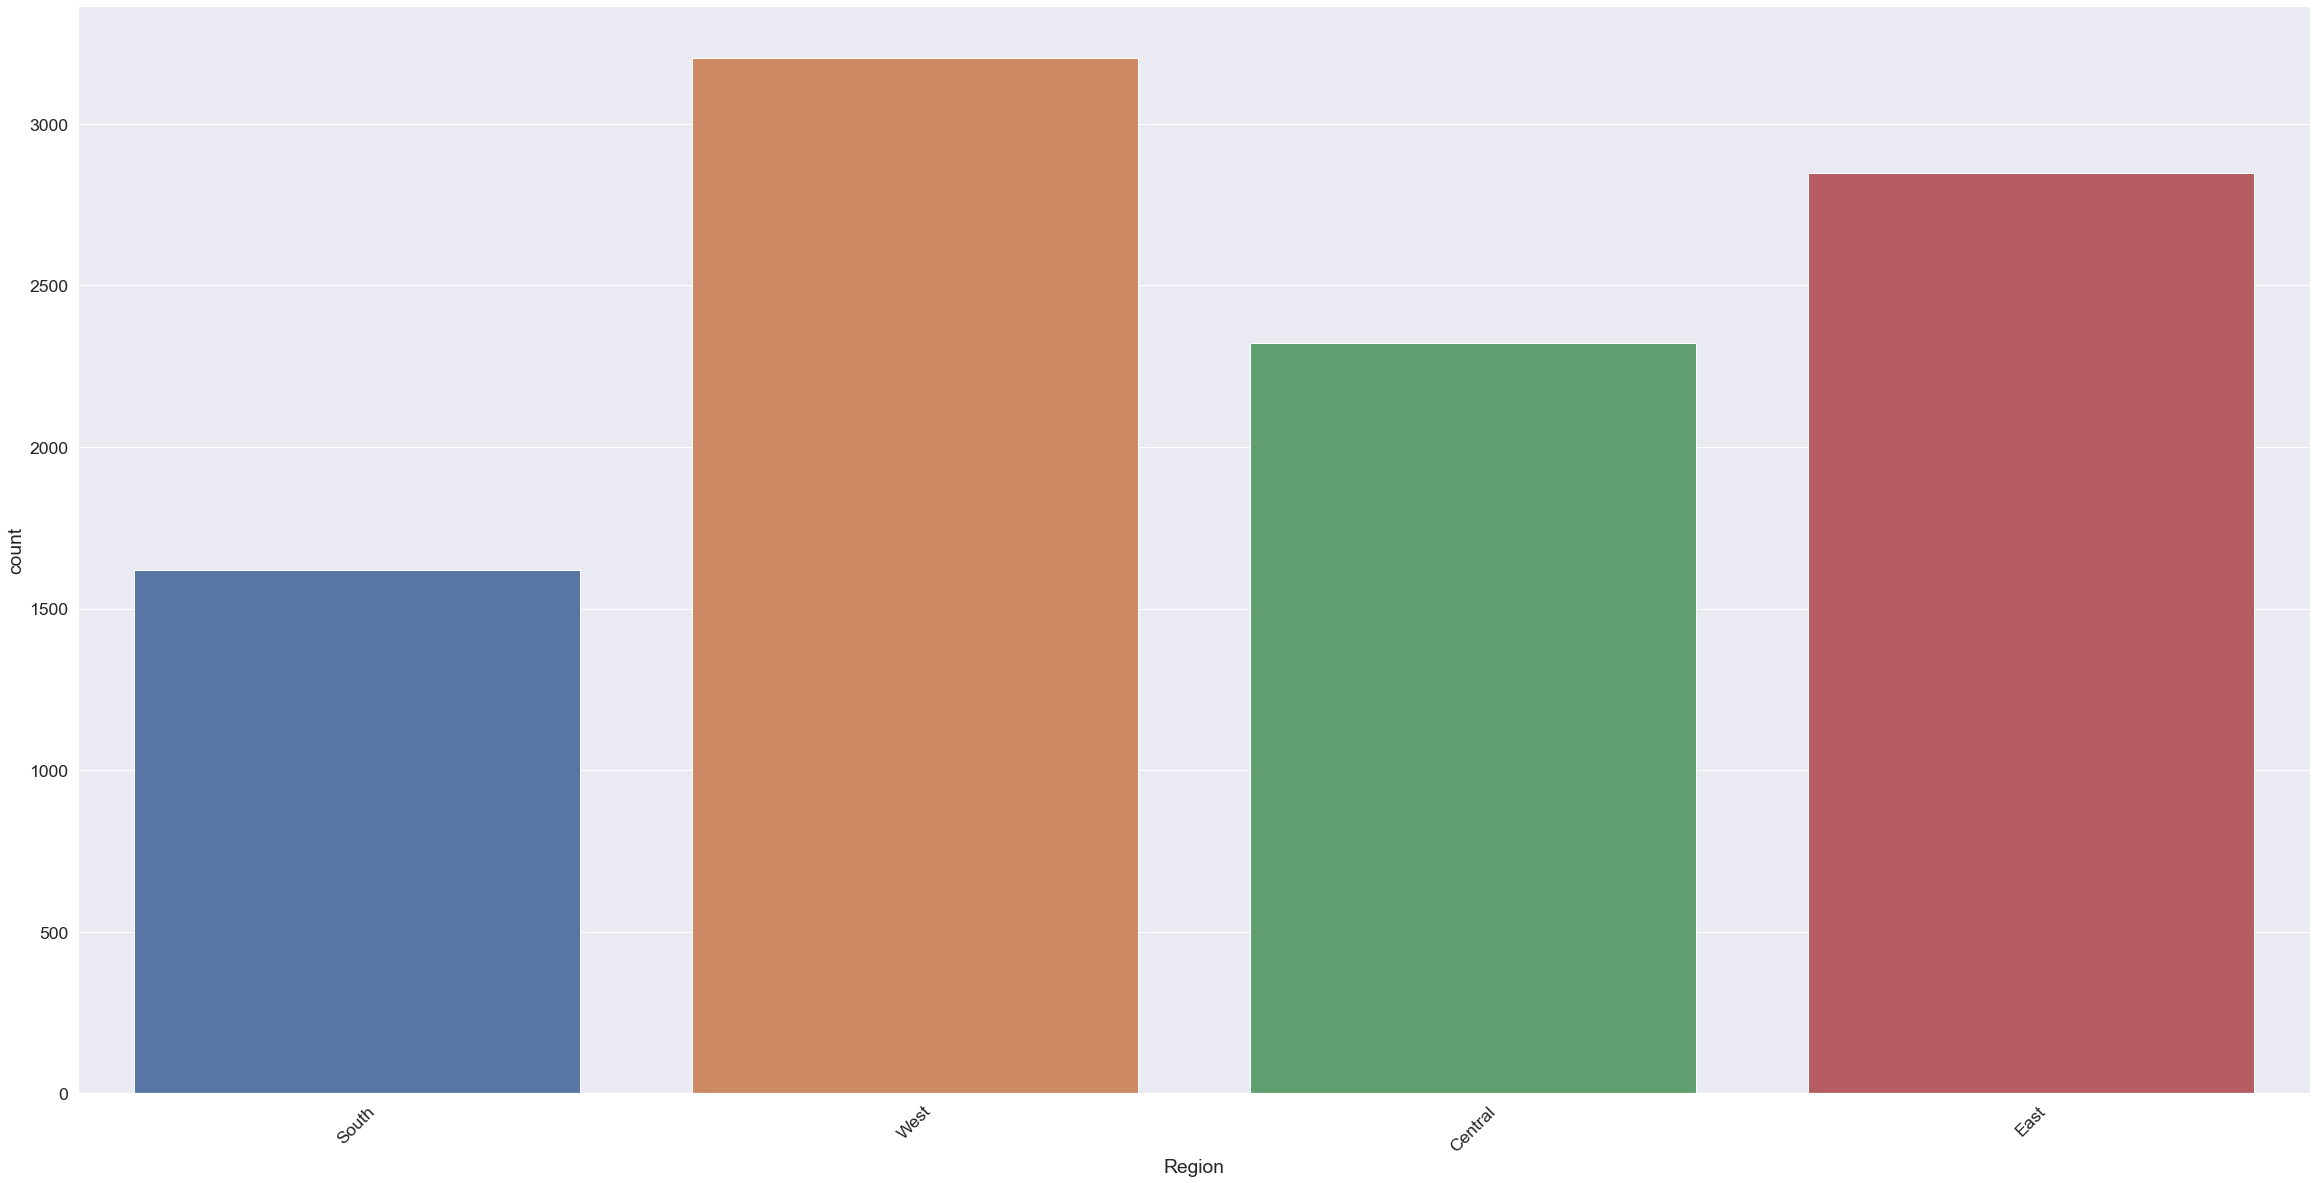

In [24]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'Region', data=store)
plt.xticks(rotation = 45)
plt.show() # The demand for products is much higher in the West region follwed by East, Central and South Region.

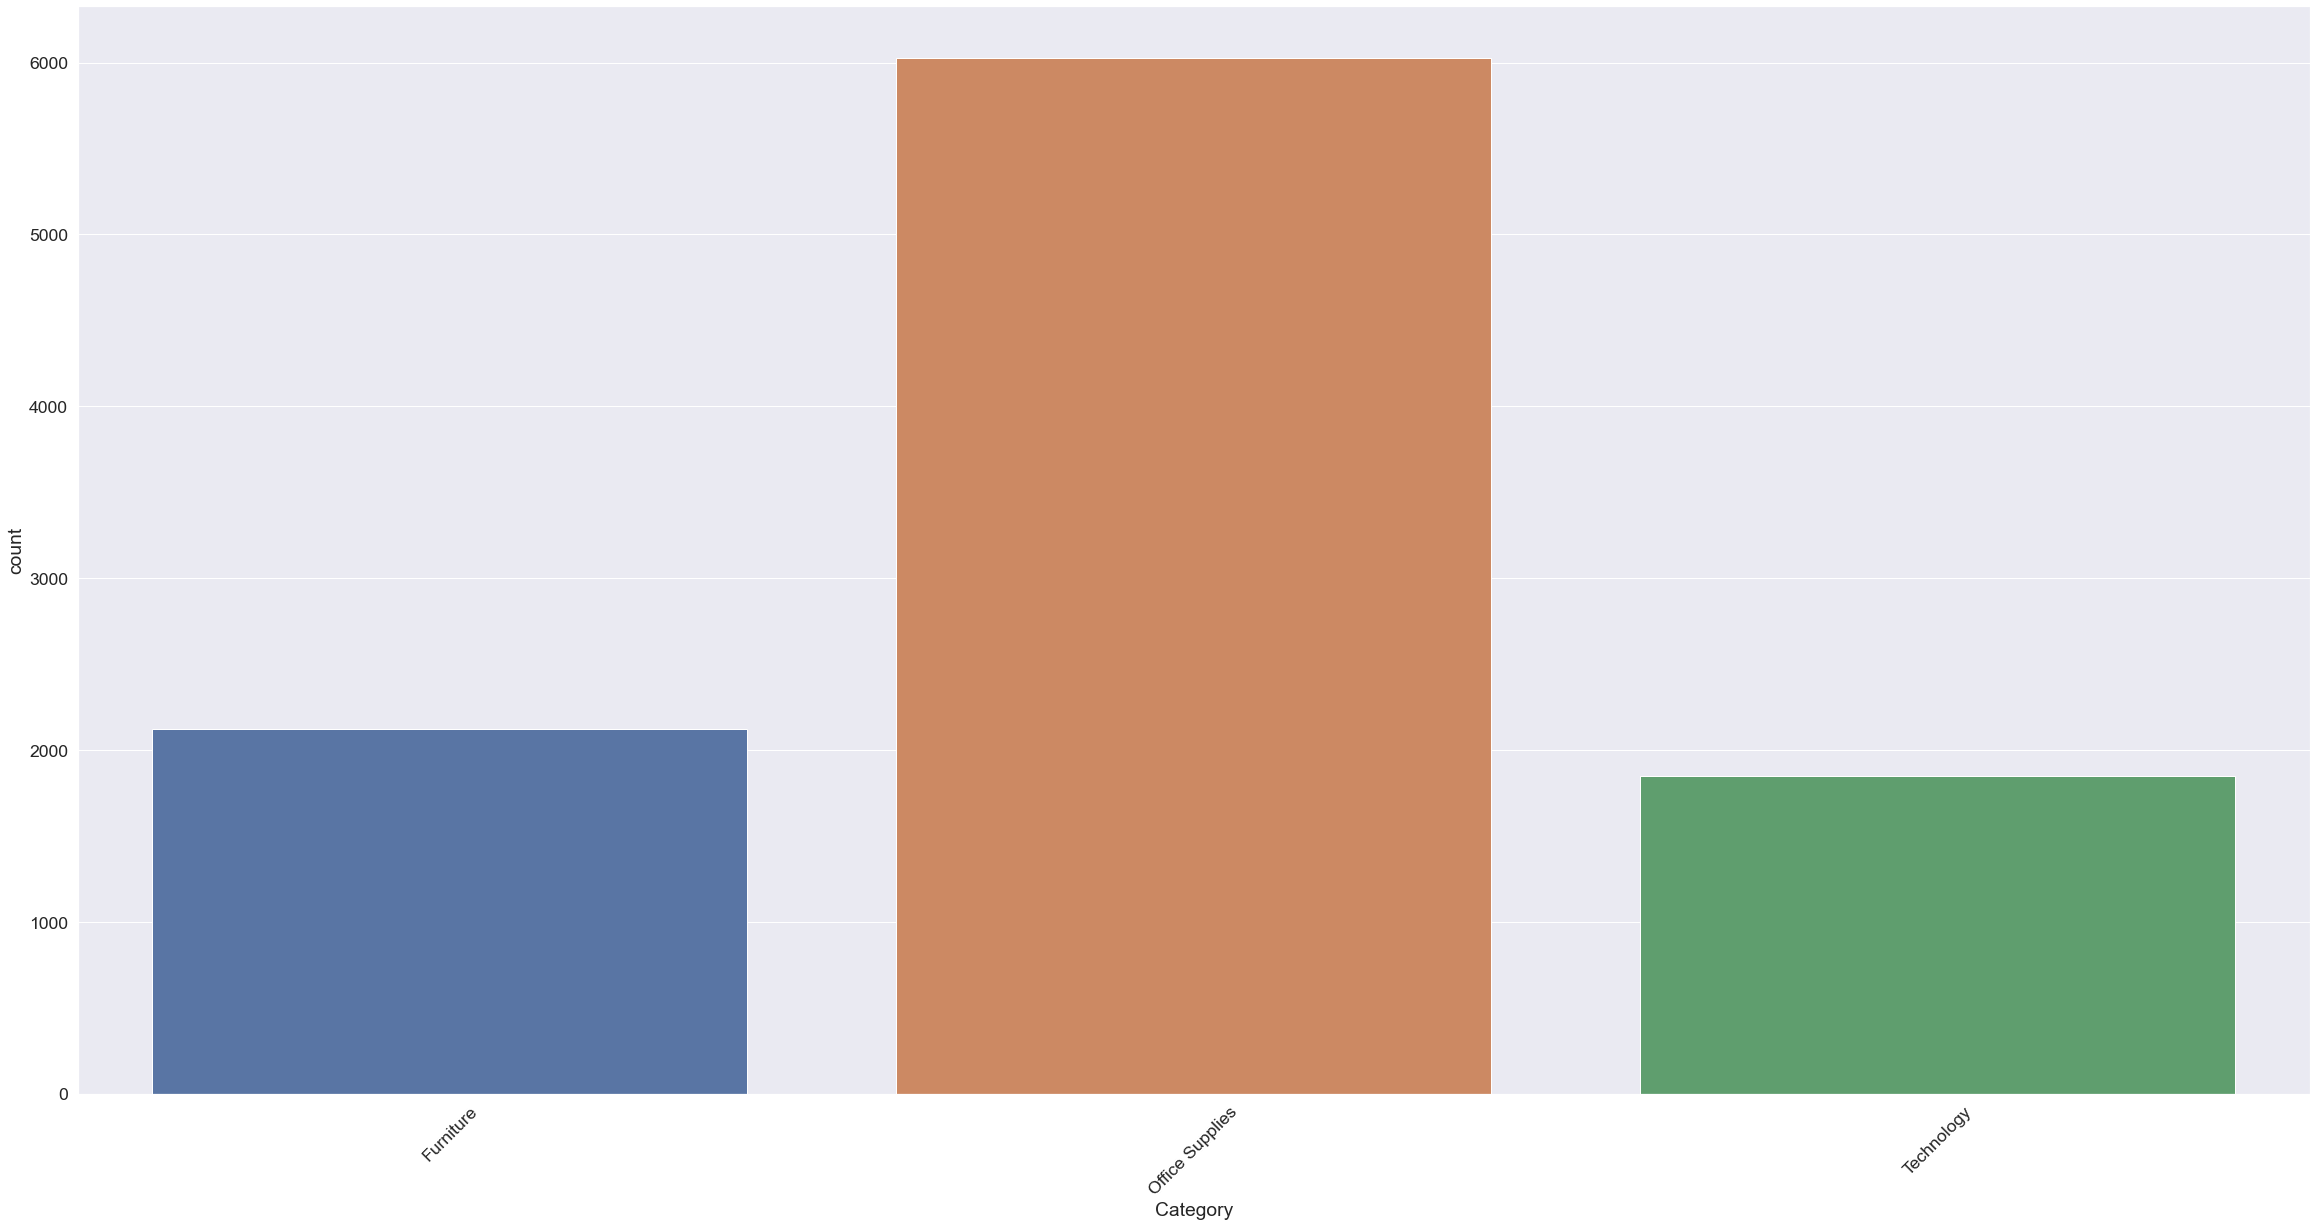

In [25]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'Category', data=store)
plt.xticks(rotation = 45)
plt.show() # Customers are mostly purchasing Office Supplies for respective jobs followed by Furniture and Technology.

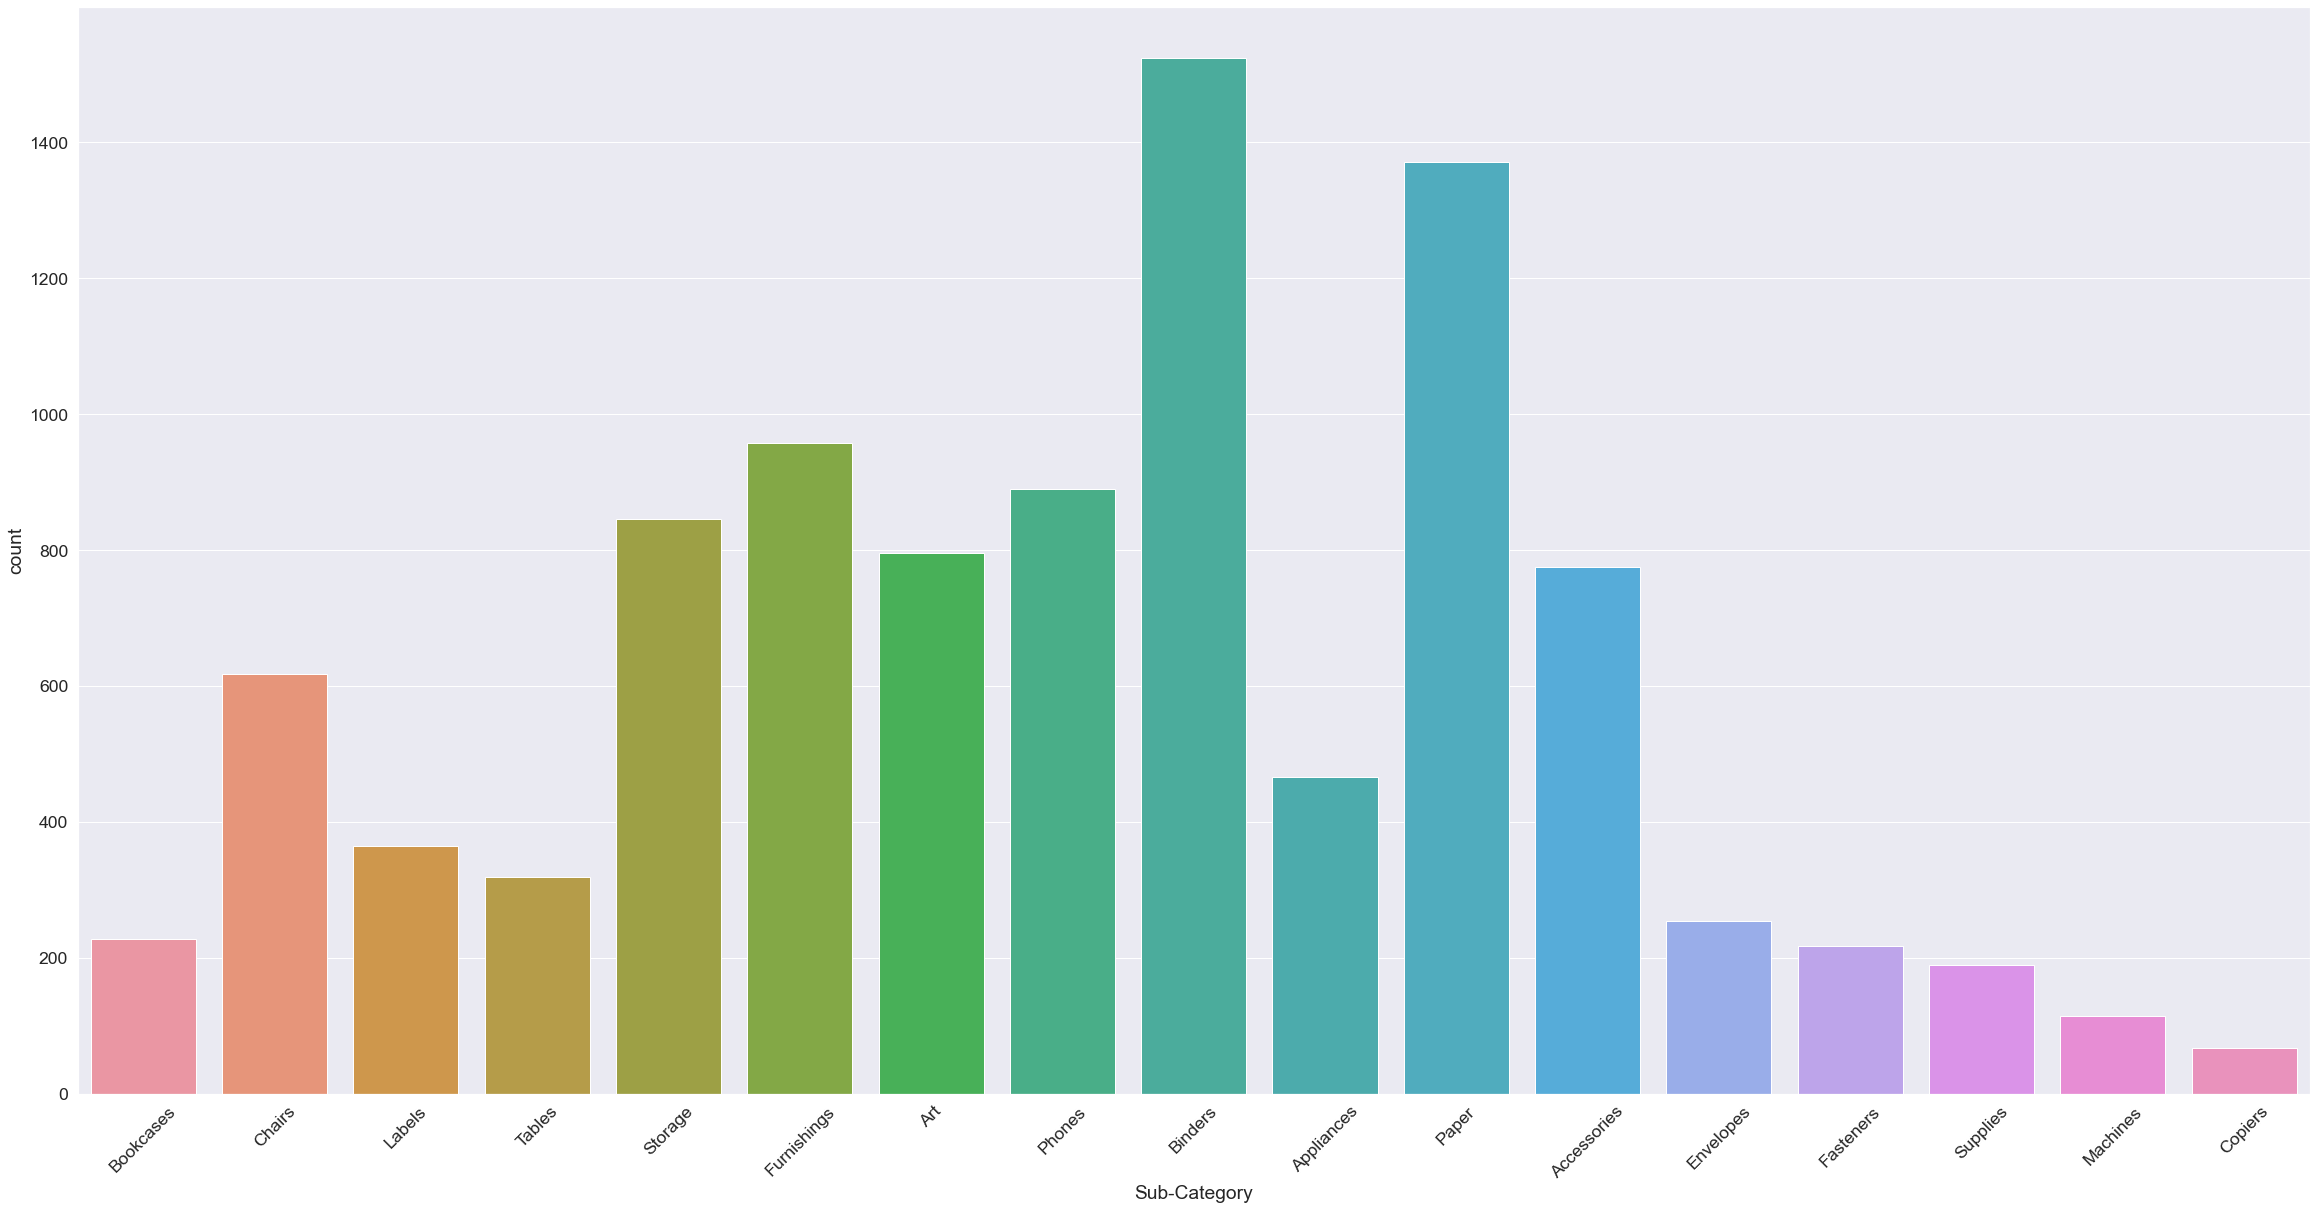

In [26]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'Sub-Category', data=store)
plt.xticks(rotation = 45)
plt.show() # Consumption amongst customers has mostly increased for Binders, Papers, Furnishings, Phones and Storage equipment.

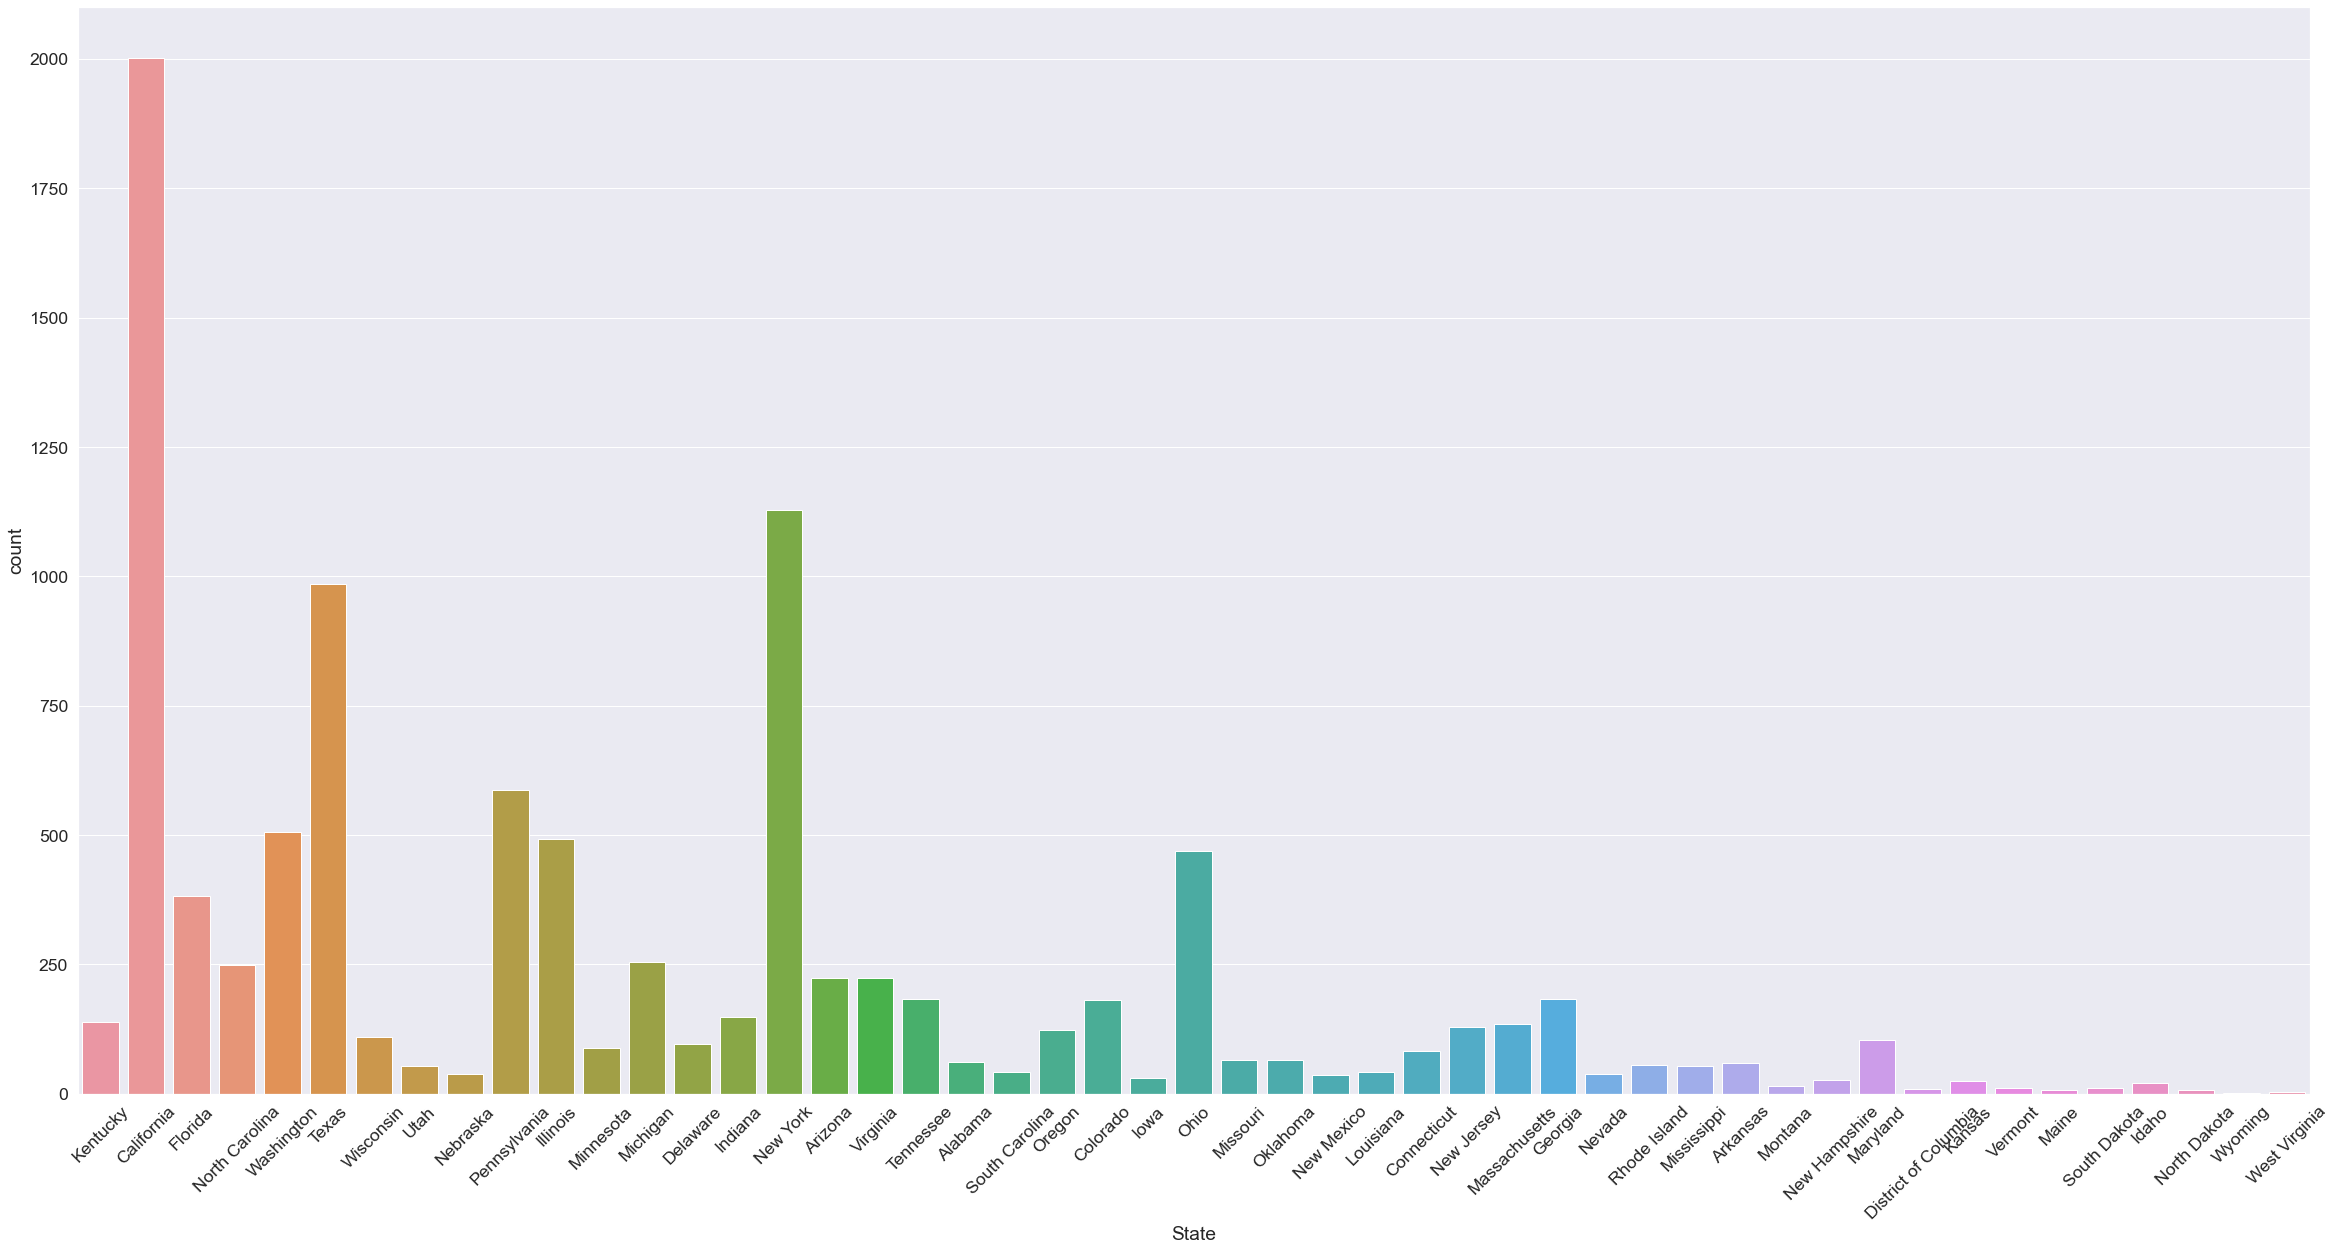

In [27]:
sns.set(font_scale=1.6)
plt.figure(figsize =(40,20))
sns.countplot(x = 'State', data=store)
plt.xticks(rotation = 45)
plt.show() # The customers are mostly from the state of California, NY City, Texas, Pennsylvania and Washington.

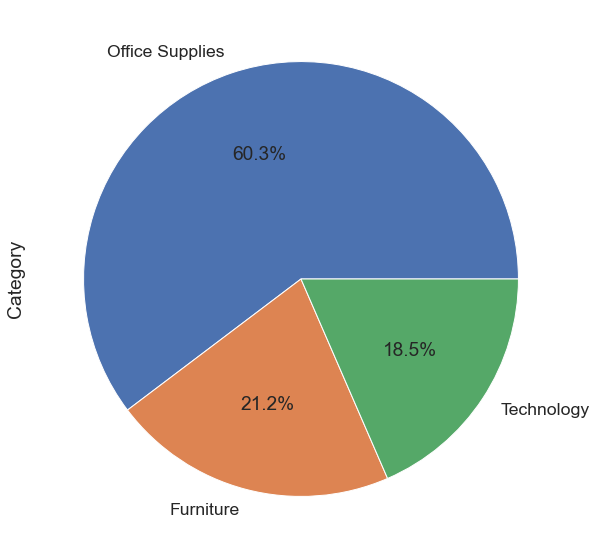

In [28]:
plt.figure(figsize = (10,10))
store['Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
# Majority of our demand comes in the form of office supplies and it is 60.3% amoungst customer.
# This is followed by furniture and technology.

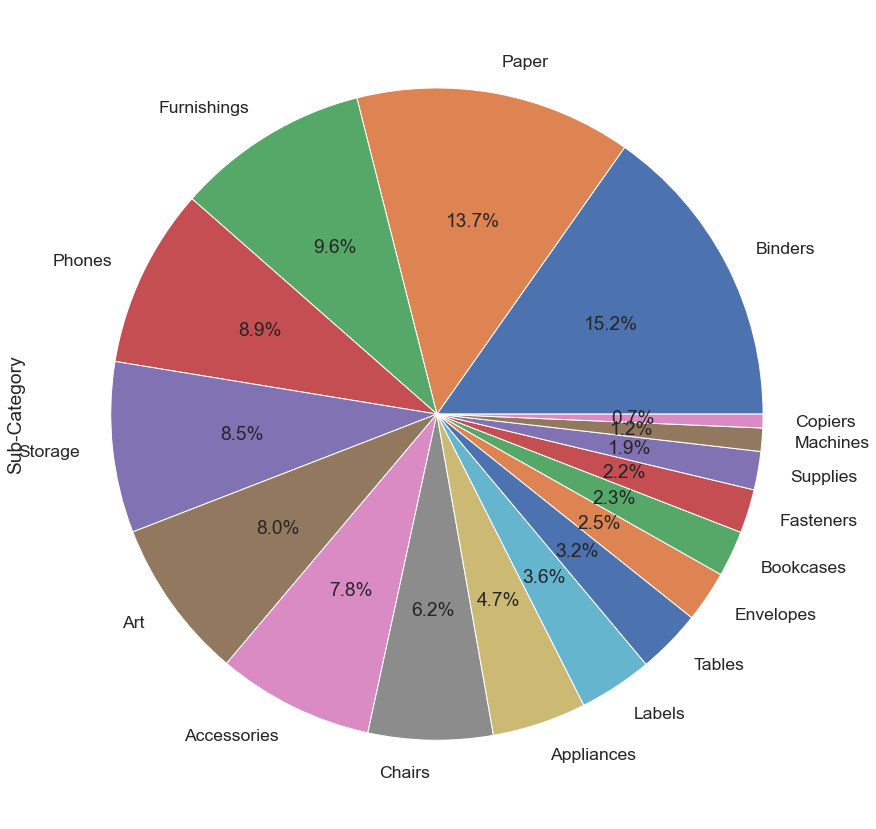

In [29]:
plt.figure(figsize = (15,15))
store['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

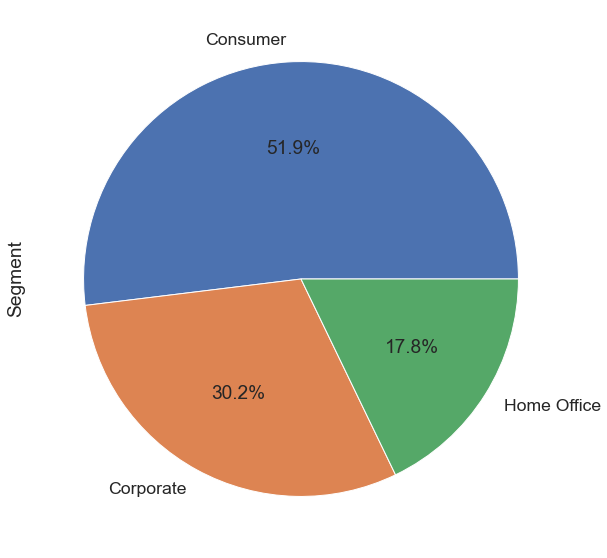

In [30]:
plt.figure(figsize = (10,10))
store['Segment'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
# Major segment share consists of consumer products i.e. 51.9% followed by coporate and home office products.

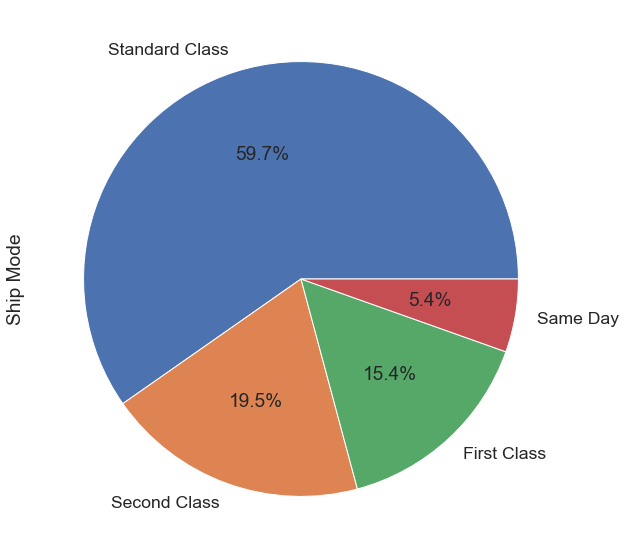

In [31]:
plt.figure(figsize = (10,10))
store['Ship Mode'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
# Almost 60% of the customers prefer standard class shipping mode for delivery of their products.
# Rest of the customers prefer other types of shipping mode depending upon urgency amd comfort.

In [32]:
num_col = store.select_dtypes(exclude = ['object']).columns
store[num_col].head(2)

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.96,2,0.0,41.9136
1,42420,731.94,3,0.0,219.5820


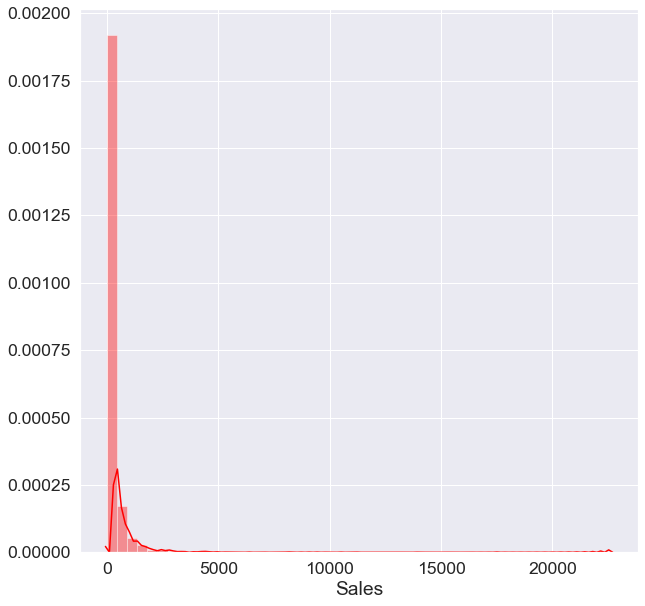

In [33]:
plt.figure(figsize = (10,10))
sns.distplot(store['Sales'], color='red', kde = True)
plt.show()
# The sales of most of the items is under the amount of 5000, however in some cases large sales have been made close to amount 23000.

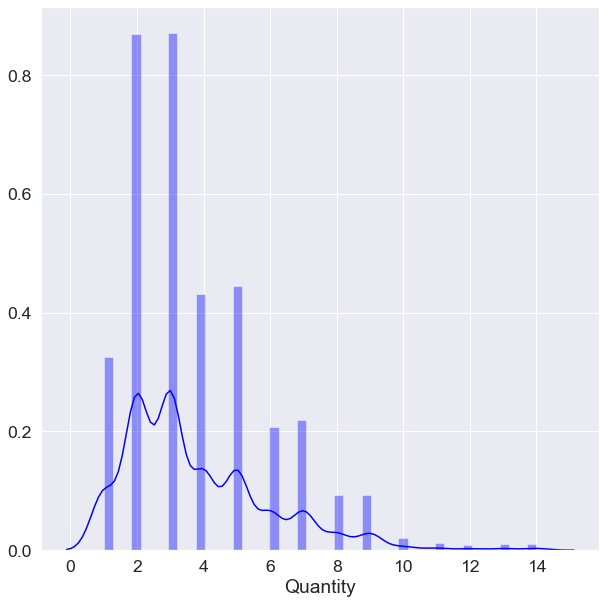

In [34]:
plt.figure(figsize = (10,10))
sns.distplot(store['Quantity'], color='Blue', kde = True)
plt.show()
# The maximum quantity purchased of an item is 14.
# However, most commonly number of item purchased is 2 or 3.
# The minimum quantity purchased of an item is 1.

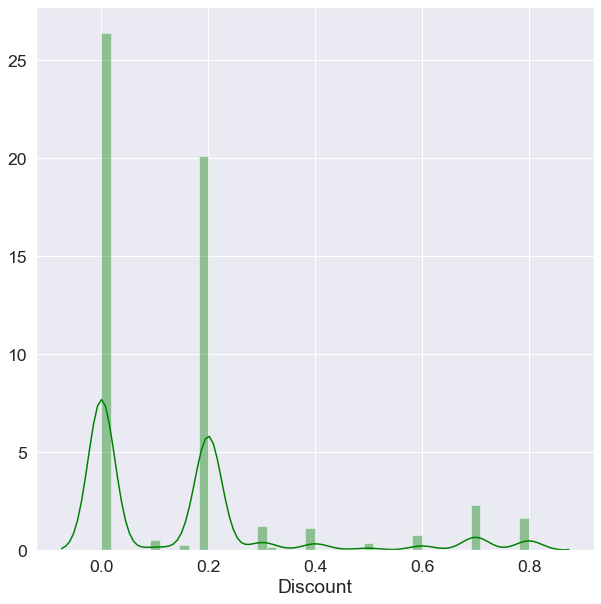

In [35]:
plt.figure(figsize = (10,10))
sns.distplot(store['Discount'], color='green', kde = True)
plt.show()
# Most of the items had no discount on them.
# If the customers had made bulk purchases then discount of 20% have been made followed higher discounts in other extreme instances.

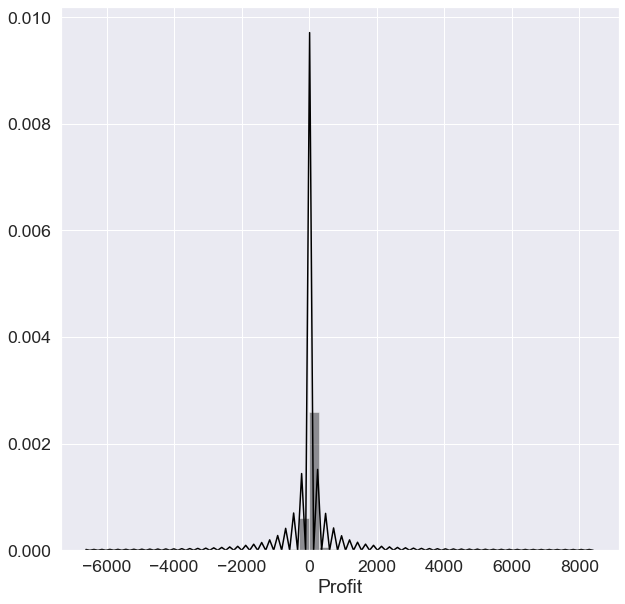

In [36]:
plt.figure(figsize = (10,10))
sns.distplot(store['Profit'], color='black', kde = True)
plt.show()
# There have been both Profit as well as Losses in the super store.
# However most of the items have been sold at the MRP.
# Loss of around 6000 and Profit of around 8000 has been made throughout the sale of different items.

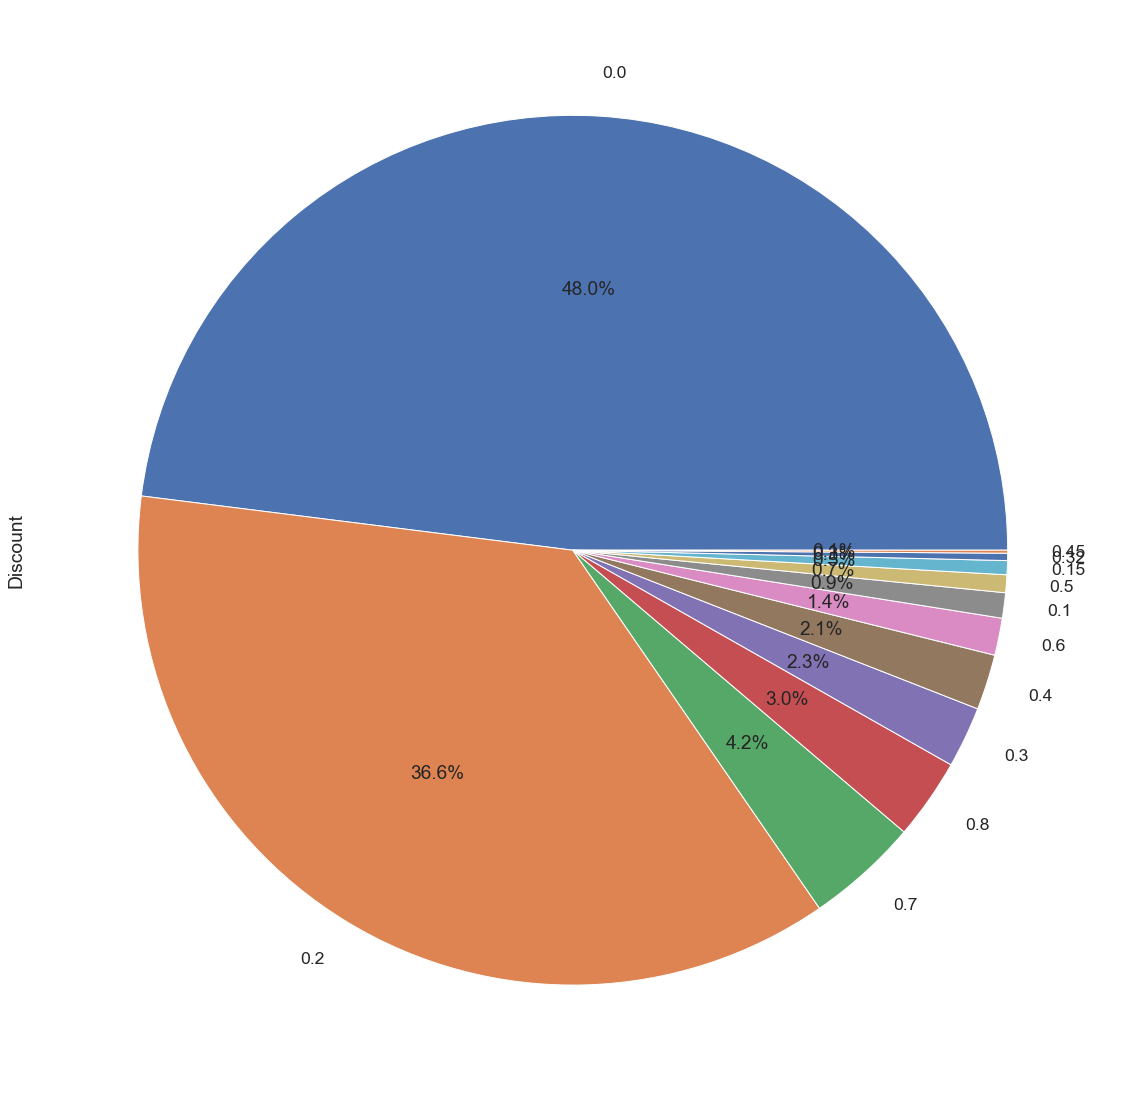

In [37]:
plt.figure(figsize = (20,20))
store['Discount'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
# We can now tell that most of the products(approx 50%) are sold without discount.
# Majority of the discount if given is that 20% followeed by other discounts.

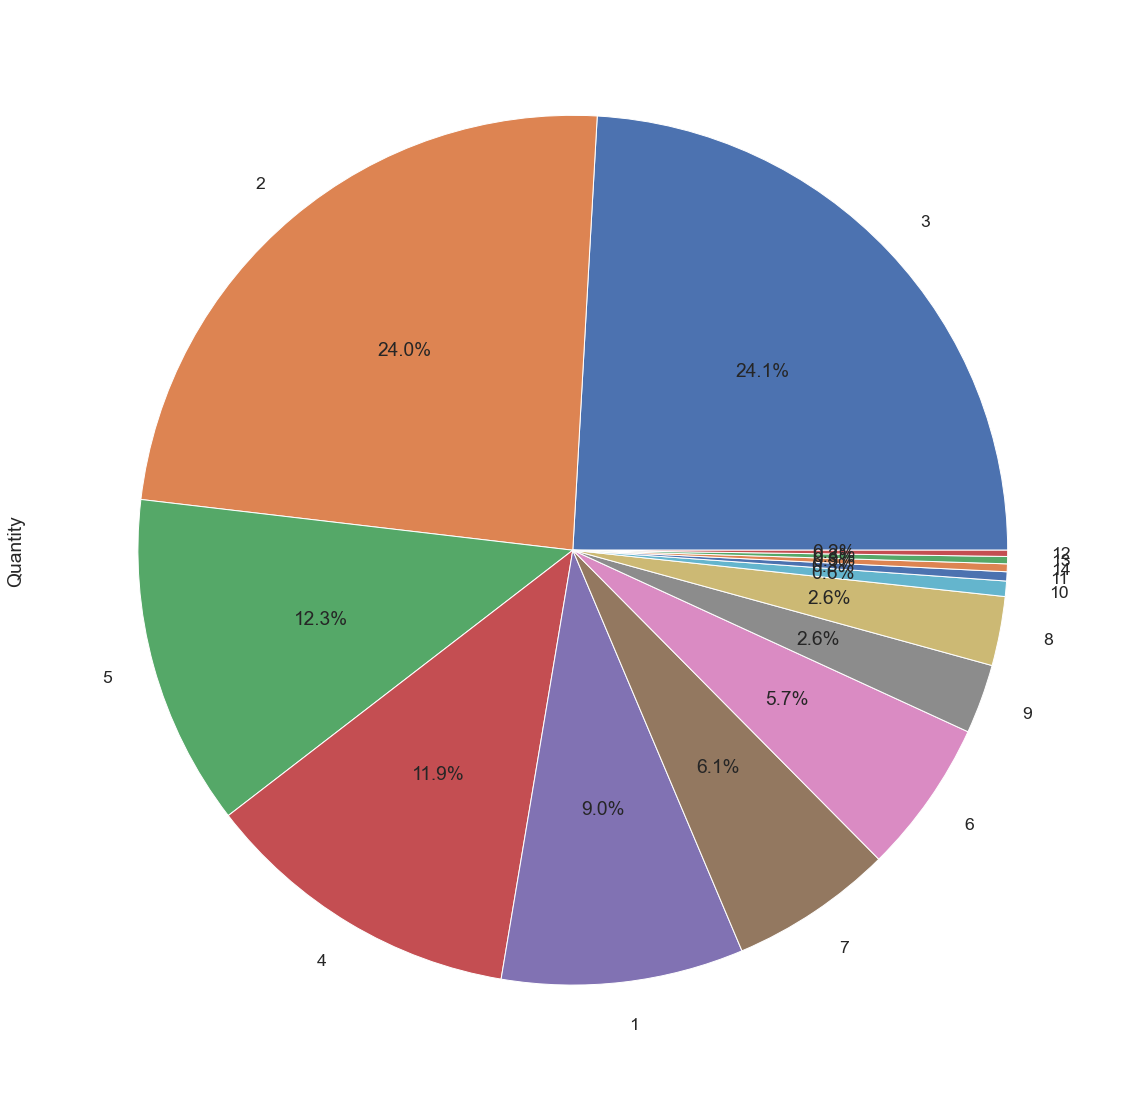

In [38]:
plt.figure(figsize = (20,20))
store['Quantity'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()
# We can here see the customer behaviour i.e. most of our customers are usually buying atleast 2 or 3 quantity of the same item.

# Bivariate Analysis

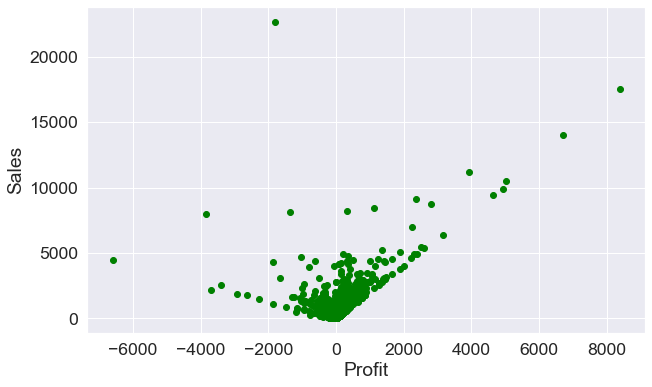

In [39]:
# Scatter Plot (Numerical & Numerical)
plt.figure(figsize = [10,6])
plt.scatter(store.Profit , store.Sales , color = 'green')
plt.xlabel('Profit')
plt.ylabel('Sales')
plt.show()
# Profits have been made where the sales have bigger in number and there are multiple instances for the same.
# There are less instances for losses but they significant. This could be due to poor sales or not worth of money.

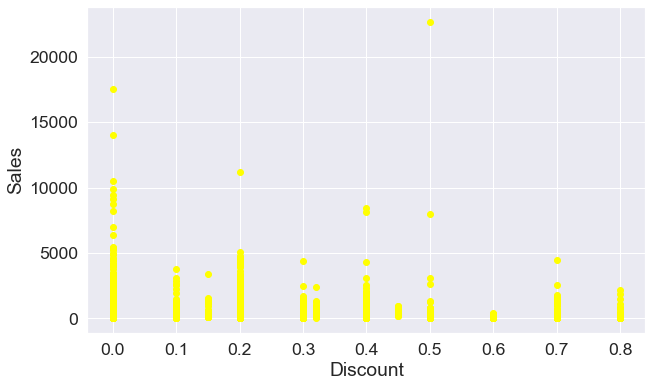

In [40]:
plt.figure(figsize = [10,6])
plt.scatter(store.Discount , store.Sales , color = 'yellow')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()
# Most of the sales have been done on 0% discount.
# However we can see that variuos discount have been offered at multiple instances. This could be beacause of bulk purchase or high end equipment.

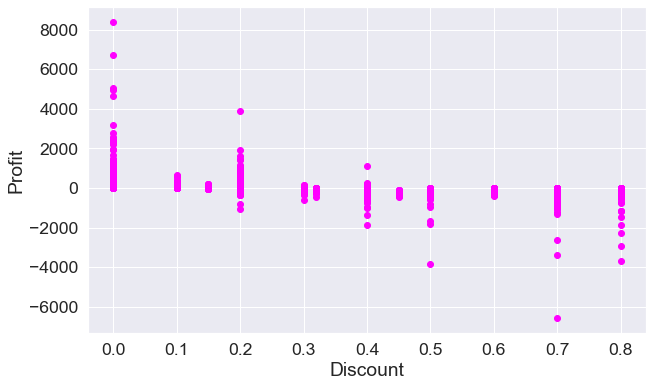

In [41]:
plt.figure(figsize = [10,6])
plt.scatter(store.Discount , store.Profit , color = 'magenta')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()
# It is interesting to see that when no or less discount have been offered, the profits are high.
# However, when the discount have been increased we can see that it has led store to have more loss.

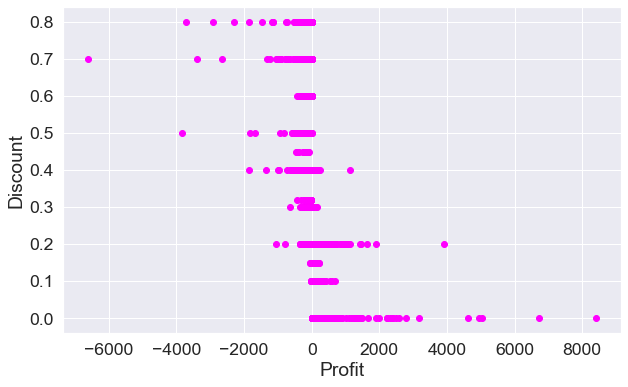

In [42]:
plt.figure(figsize = [10,6])
plt.scatter(store.Profit , store.Discount , color = 'magenta')
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.show()

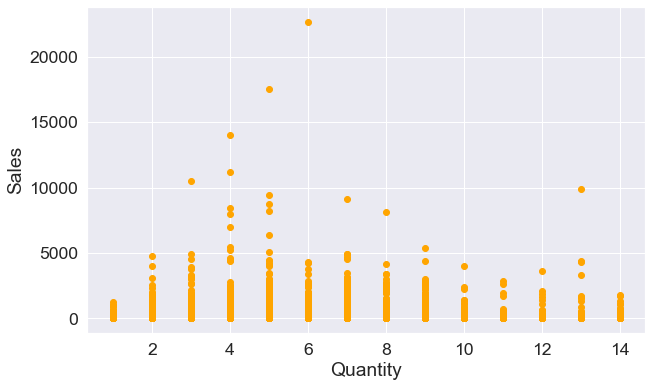

In [43]:
plt.figure(figsize = [10,6])
plt.scatter(store.Quantity , store.Sales , color = 'orange')
plt.xlabel('Quantity')
plt.ylabel('Sales')
plt.show()
# The sales are higher when customers buys the products in bulk.
# We can see that products purchased more than 2 have more sales in multiple cases.

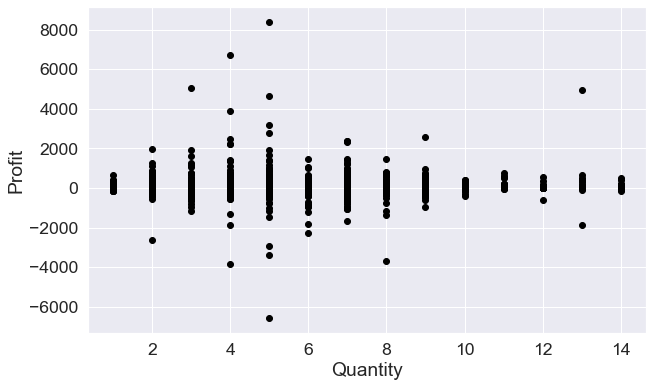

In [44]:
plt.figure(figsize = [10,6])
plt.scatter(store.Quantity , store.Profit , color = 'black')
plt.xlabel('Quantity')
plt.ylabel('Profit')
plt.show()
# Here, we can see that profit and loss are in equal proportion, when consumers buys products in bulk.

In [45]:
store[cat_col].columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [46]:
store[num_col].columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

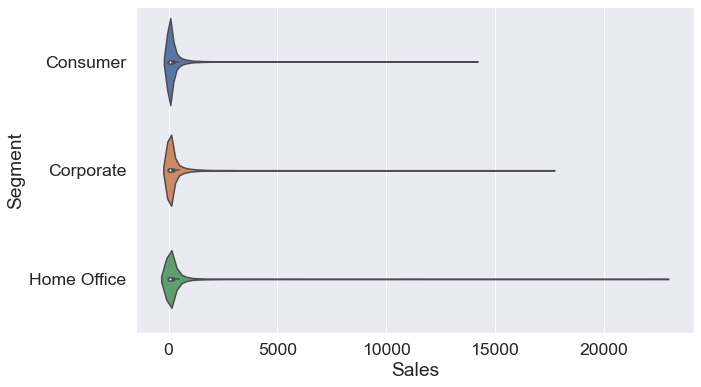

In [47]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,6])
sns.violinplot(x="Sales", y="Segment", data=store)
plt.show()
# Sales of Home Office segment have been more higher followed by Corporate and Consumer segment. 

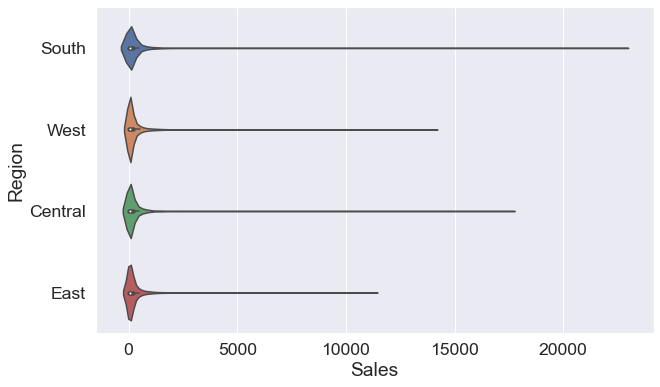

In [48]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,6])
sns.violinplot(x="Sales", y="Region", data=store)
plt.show()
# South Region has more sales in terms of amount in extreme cases.
# West Region has more datapoints than rest of the region.

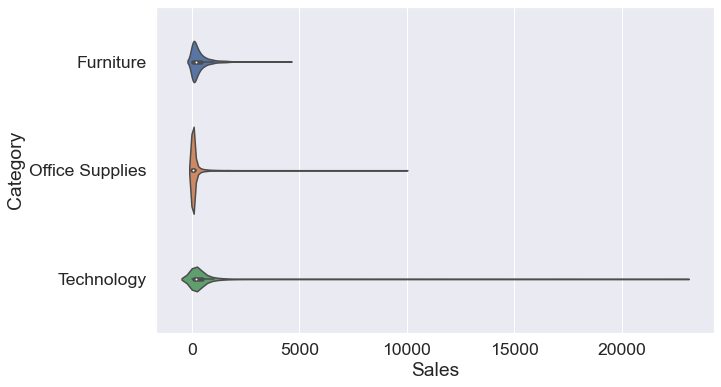

In [49]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,6])
sns.violinplot(x="Sales", y="Category", data=store)
plt.show()
# Office Supplies has more data distribution than Furniture and Technology.
# However sales of technology equipments is more significant.

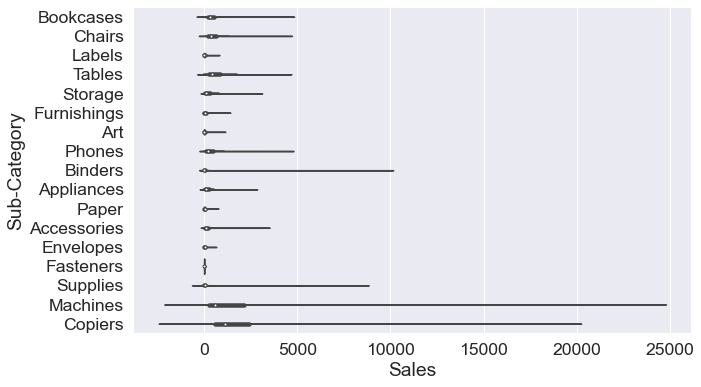

In [50]:
# Boxplot   (Numerical & Catagorical)
plt.figure(figsize = [10,6])
sns.violinplot(x="Sales", y="Sub-Category", data=store)
plt.show()
# Sales of Machines, Copiers, Bunders and Supplies is significant amongst customers.

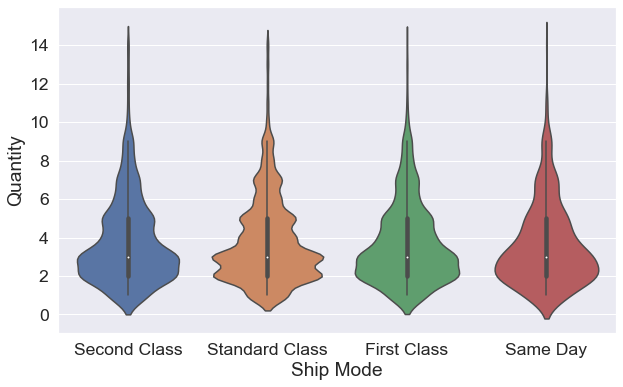

In [51]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Ship Mode", y="Quantity", data=store)
plt.show()
# Ship Mode has equal proportion of data in terms of quantity. 

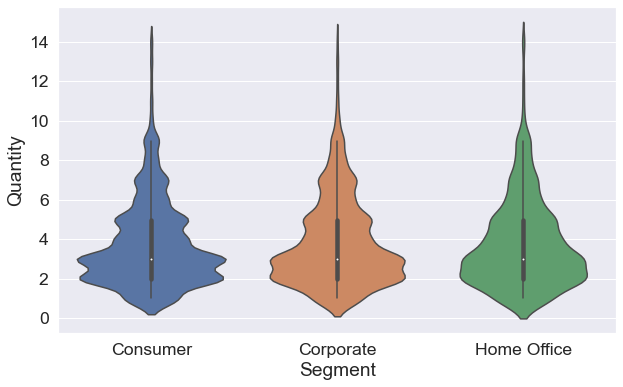

In [52]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Segment", y="Quantity", data=store)
plt.show()
# Segment has equal proportion of data in terms of quantity

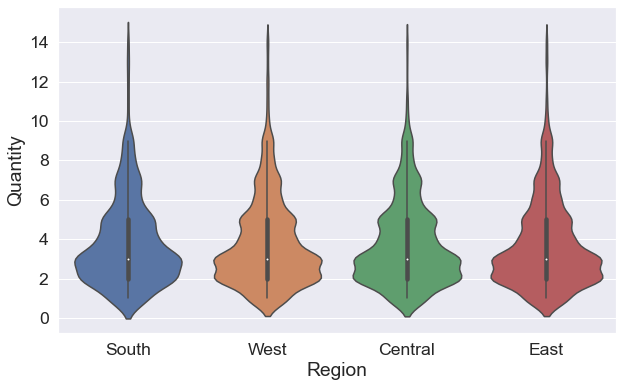

In [53]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Region", y="Quantity", data=store)
plt.show()
# Region has equal proportion of data in terms of quantity.

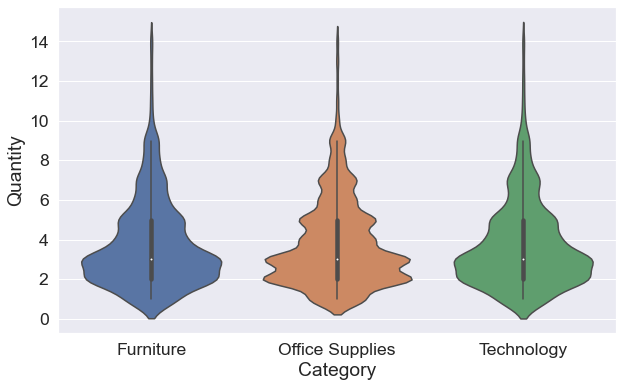

In [54]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Category", y="Quantity", data=store)
plt.show()
# Category has equal proportion of data in terms of quantity.

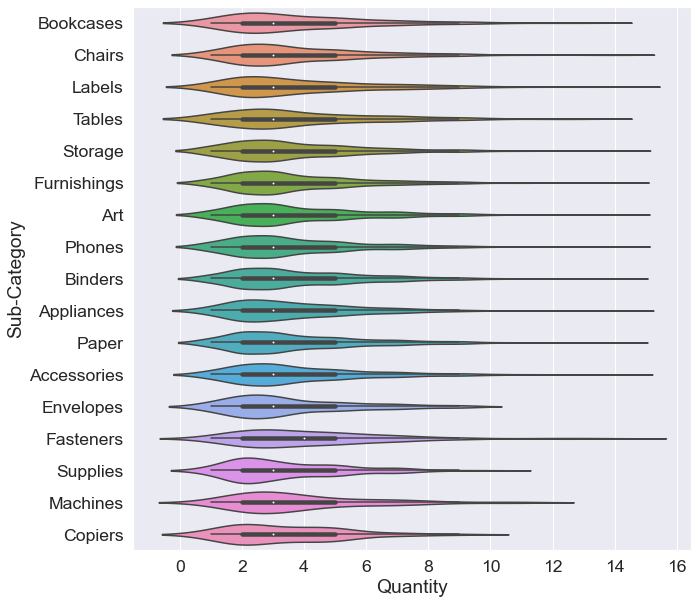

In [55]:
plt.figure(figsize = [10,10])
sns.violinplot(x="Quantity", y="Sub-Category", data=store)
plt.show()
# Sub-Category has equal proportion of data in terms of quantity.

In [56]:
store[cat_col].columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [57]:
store[num_col].columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

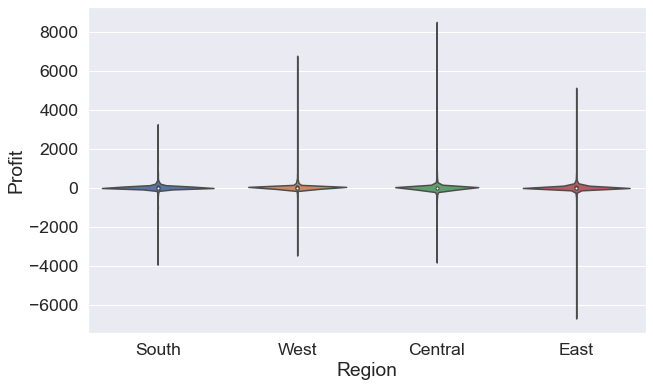

In [58]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Region", y="Profit", data=store)
plt.show()
# East Region has suffered more losses than other regions.
# Central Region has made more profits than other regions.

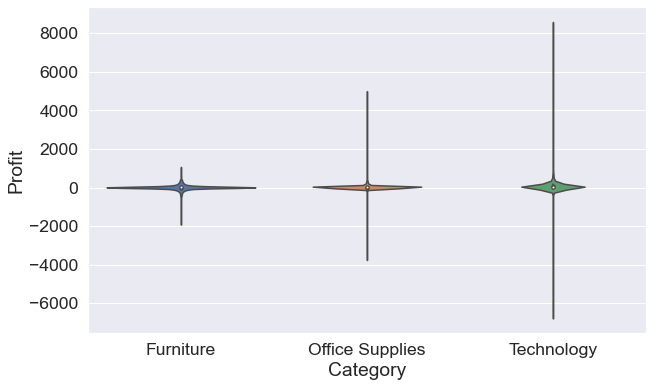

In [59]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Category", y="Profit", data=store)
plt.show()
# Data Distribution is highest in Furniture Category followed by Office Supplies and Technology.
# Both profit and loss is high Technology Category in equal proportion.

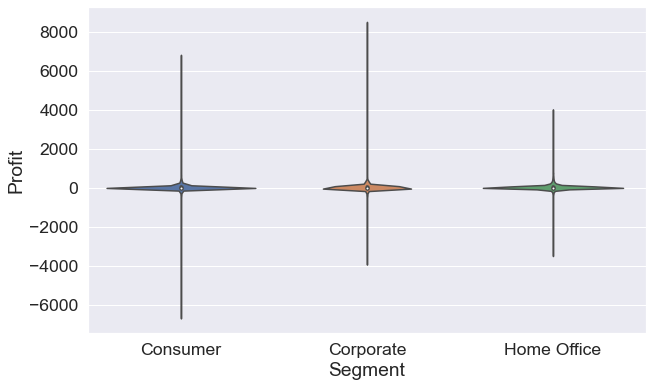

In [60]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Segment", y="Profit", data=store)
plt.show()
# Data Distribution is highest in Consumer Segment followed by Home Office and Corporate.
# Both profit and loss is high Consumer Segment in equal proportion.
# Corporate Segemnt has more profits than other two segments.

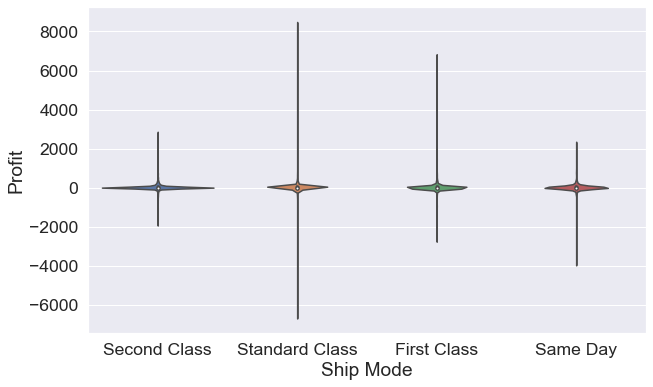

In [61]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Ship Mode", y="Profit", data=store)
plt.show()
# Data Distribution is highest in Consumer Segment followed by Home Office and Corporate.
# Both profit and loss is high Standard Class in equal proportion.
# First Class has more profits than other three segments.

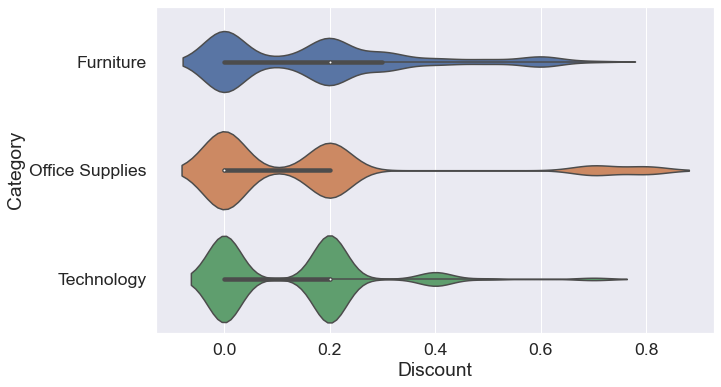

In [62]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Discount", y="Category", data=store)
plt.show()
# Most of the items have received no discounts or 20% discounts as per data distribution.
# Both Furniture and Technology Category have received atleast 20% discounts on thier products.
# Office Supplies Category are either getting no discounts or 80% discounts which could be due to bulk order.

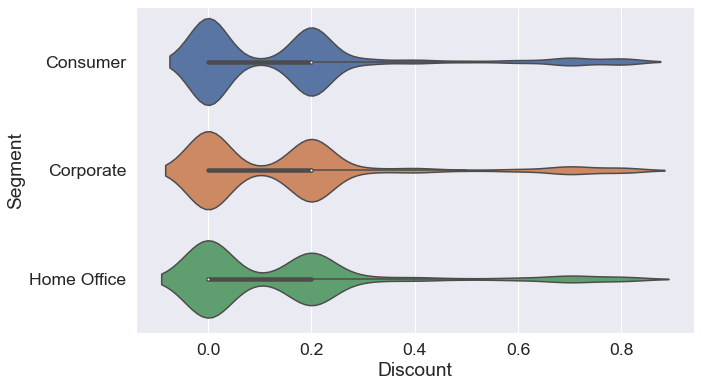

In [63]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Discount", y="Segment", data=store)
plt.show()
# Most of the items have received no discounts or 20% discounts as per data distribution.
# Both Consumer and Corporate Category have received atleast 20% discounts on their products.
# Home Office Segment are either getting no discounts or 80% discounts followed by Consumer and Corporate Segment.

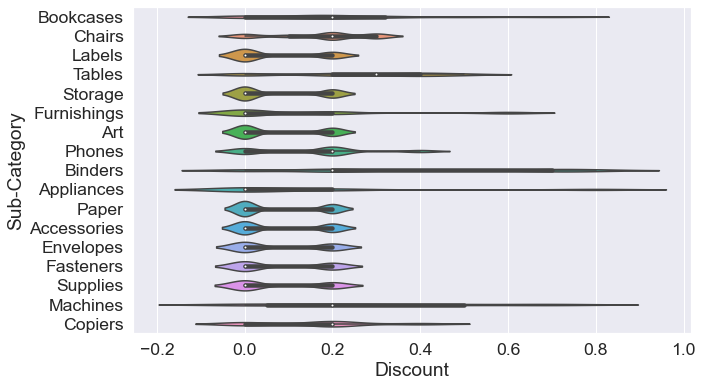

In [64]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Discount", y="Sub-Category", data=store)
plt.show()

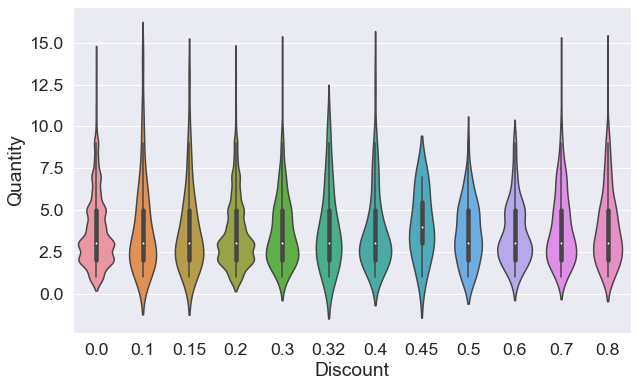

In [65]:
plt.figure(figsize = [10,6])
sns.violinplot(x="Discount", y="Quantity", data=store)
plt.show()
# Most of the items are getting discount in the range of 2.5% to 5%.
# Maximum quantity purchased for an item is 9.
# There is almost equal data distribution for all items present in the store. 

In [66]:
store[cat_col].columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [67]:
pd.crosstab(store.State, store.Region).T

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Region,,,,,,,,,,,,,,,,,,,,,
Central,0,0,0,0,0,0,0,0,0,0,...,12,0,985,0,0,0,0,0,110,0
East,0,0,0,0,0,82,96,10,0,0,...,0,0,0,0,11,0,0,4,0,0
South,61,0,60,0,0,0,0,0,383,184,...,0,183,0,0,0,224,0,0,0,0
West,0,224,0,2001,182,0,0,0,0,0,...,0,0,0,53,0,0,506,0,0,1


In [68]:
pd.crosstab(store['Category'], store['Sub-Category']) # There is more demand for Binders, Paper, Furnishings, Phones, Storage and Art.

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Category,,,,,,,,,,,,,,,,,
Furniture,0,0,0,0,228,617,0,0,0,957,0,0,0,0,0,0,319
Office Supplies,0,466,796,1523,0,0,0,254,217,0,364,0,1370,0,846,190,0
Technology,775,0,0,0,0,0,68,0,0,0,0,115,0,889,0,0,0


In [69]:
pd.crosstab(store['Ship Mode'], store['Segment']) # For every segment standard class shipping is the first choice followed by second class.

Segment,Consumer,Corporate,Home Office
Ship Mode,,,
First Class,769,485,284
Same Day,317,114,112
Second Class,1020,609,316
Standard Class,3085,1812,1071


In [70]:
pd.crosstab(store['Ship Mode'], store['Region']) # Shipping is mostly taking place for West Region followed by Central, East and South region.

Region,Central,East,South,West
Ship Mode,,,,
First Class,299,490,234,515
Same Day,120,155,83,185
Second Class,465,530,329,621
Standard Class,1439,1673,974,1882


In [71]:
pd.crosstab(store['Ship Mode'], store['State'])

State,Alabama,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Ship Mode,,,,,,,,,,,,,,,,,,,,,
First Class,9,42,10,322,44,19,18,0,54,22,...,2,22,144,4,0,50,68,0,12,0
Same Day,1,16,2,119,6,10,2,0,28,15,...,0,2,48,2,0,5,39,1,7,0
Second Class,18,27,10,395,33,11,16,3,67,31,...,1,25,191,19,1,43,105,0,15,0
Standard Class,33,139,38,1165,99,42,60,7,234,116,...,9,134,602,28,10,126,294,3,76,1


In [72]:
pd.crosstab(store['Ship Mode'], store['Category'])

Category,Furniture,Office Supplies,Technology
Ship Mode,,,
First Class,327,910,301
Same Day,119,326,98
Second Class,427,1152,366
Standard Class,1248,3638,1082


In [73]:
pd.crosstab(store['Ship Mode'], store['Sub-Category'])

Sub-Category,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
Ship Mode,,,,,,,,,,,,,,,,,
First Class,128,76,112,239,49,85,12,32,30,146,60,23,217,138,119,25,47
Same Day,41,23,36,74,7,39,5,14,14,52,21,10,81,42,52,11,21
Second Class,162,79,155,263,48,134,15,53,37,184,62,14,289,175,171,43,61
Standard Class,444,288,493,947,124,359,36,155,136,575,221,68,783,534,504,111,190


In [74]:
pd.crosstab(store['Segment'], store['Region'])

Region,Central,East,South,West
Segment,,,,
Consumer,1212,1469,838,1672
Corporate,673,877,510,960
Home Office,438,502,272,571


In [75]:
pd.crosstab(store['Segment'], store['Category'])

Category,Furniture,Office Supplies,Technology
Segment,,,
Consumer,1113,3127,951
Corporate,646,1820,554
Home Office,362,1079,342


In [76]:
pd.crosstab(store['Category'], store['Region'])

Region,Central,East,South,West
Category,,,,
Furniture,481,601,332,707
Office Supplies,1422,1712,995,1897
Technology,420,535,293,599


In [77]:
# Removing Postal Codes Feature from the dataset.
store.drop(['Postal Code'],axis=1, inplace = True)
store.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [78]:
store.groupby('State').Profit.agg(['sum','mean','min','max','count','median','std','var'])

,sum,mean,min,max,count,median,std,var
State,,,,,,,,
Alabama,5786.8253,94.865989,0.0000,1459.2000,61,16.87500,210.901876,44479.601429
Arizona,-3427.9246,-15.303235,-814.4832,211.4955,224,2.53365,109.266267,11939.117124
Arkansas,4008.6871,66.811452,1.4190,843.1706,60,18.34080,123.249880,15190.532873
California,76381.3871,38.171608,-325.5720,1906.4850,2001,13.30560,97.691593,9543.647400
Colorado,-6527.8579,-35.867351,-3399.9800,247.9960,182,3.12480,276.424024,76410.240842
Connecticut,3511.4918,42.823071,-15.5826,294.6710,82,12.18310,66.138081,4374.245726
Delaware,9977.3748,103.930988,-48.7839,5039.9856,96,19.19700,518.953513,269312.749126
District of Columbia,1059.5893,105.958930,4.4344,648.5624,10,14.52720,213.461353,45565.749398
Florida,-3399.3017,-8.875461,-1811.0784,327.5922,383,2.93400,126.324165,15957.794770


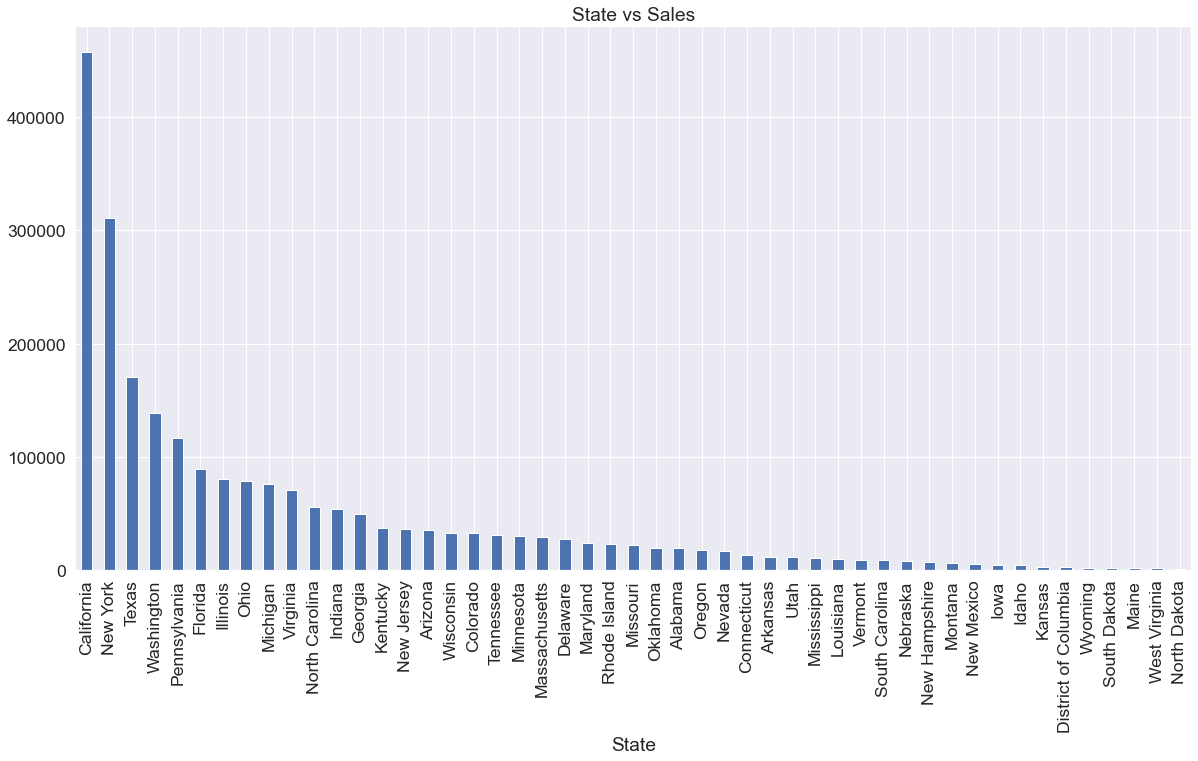

In [79]:
sample = store.groupby(['State'])['Sales'].sum()
sample.sort_values(ascending = False, inplace = True)
fig,ax = plt.subplots(figsize = (20,10)) 
plt.title('State vs Sales')
sample.plot.bar() # Most sales which have taken place are in the states of California, New York, Texas, Washington and Pennsylvania.

<ipython-input-80-1083c04ba436>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sampleUS = store.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])


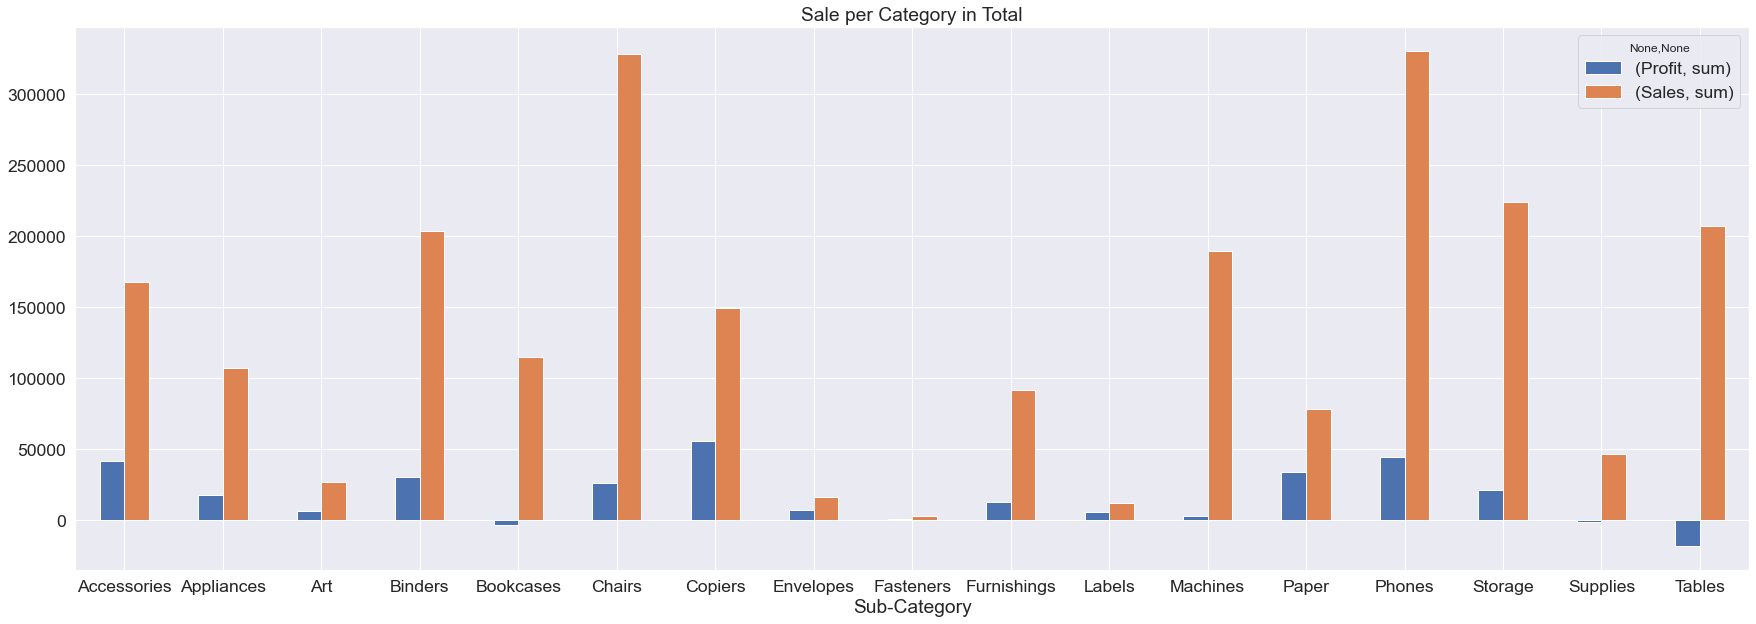

In [80]:
sampleUS = store.groupby(['Sub-Category'])['Profit','Sales'].agg(['sum'])
sampleUS.plot.bar(rot = 0, title = 'Sale per Category in Total', figsize = (30,10))
plt.show(block = True)
# Chairs and Phones has the highest amount of sales and copiers has the highest profit.

## Insights

### Univariate Analysis.

1. Standard Class of Ship Mode is mostly preferred by the consumers.

2. Consumer segment is in higher demand for personal use followed by Corporate and Home Office Segment. 

3. The demand for products is much higher in the West region follwed by East, Central and South Region.

4. Customers are mostly purchasing Office Supplies for respective jobs followed by Furniture and Technology.

5. Consumption amongst customers has mostly increased for Binders, Papers, Furnishings, Phones and Storage equipment.

6. The customers are mostly from the state of California, NY City, Texas, Pennsylvania and Washington.

7. Majority of our demand comes in the form of office supplies and it is 60.3% amoungst customer.This is followed by furniture and technology.

8. Major segment share consists of consumer products i.e. 51.9% followed by coporate and home office products.

9. Almost 60% of the customers prefer standard class shipping mode for delivery of their products.

10. est of the customers prefer other types of shipping mode depending upon urgency amd comfort.

11. The sales of most of the items is under the amount of 5000, however in some cases large sales have been made close to amount 23000.

12. The maximum quantity purchased of an item is 14.However, most commonly number of item purchased is 2 or 3. The minimum quantity purchased of an item is 1.

13. Most of the items had no discount on them.If the customers had made bulk purchases then discount of 20% have been made followed higher discounts in other extreme instances.

14. There have been both Profit as well as Losses in the super store. However most of the items have been sold at the MRP.Loss of around 6000 and Profit of around 8000 has been made throughout the sale of different items.

15. We can now tell that most of the products(approx 50%) are sold without discount. Majority of the discount if given is that 20% followeed by other discounts.

16. We can here see the customer behaviour i.e. most of our customers are usually buying atleast 2 or 3 quantity of the same item.

### Bivariate Analysis

1. Profits have been made where the sales have bigger in number and there are multiple instances for the same. There are less instances for losses but they significant. This could be due to poor sales or not worth of money.

2. Most of the sales have been done on 0% discount. However we can see that variuos discount have been offered at multiple instances. This could be beacause of bulk purchase or high end equipment.

3. It is interesting to see that when no or less discount have been offered, the profits are high. However, when the discount have been increased we can see that it has led store to have more loss.

4. The sales are higher when customers buys the products in bulk. We can see that products purchased more than 2 have more sales in multiple cases.

5. Here, we can see that profit and loss are in equal proportion, when consumers buys products in bulk.

6. Sales of Home Office segment have been more higher followed by Corporate and Consumer segment. 

7. South Region has more sales in terms of amount in extreme cases. West Region has more datapoints than rest of the region.

8. Office Supplies has more data distribution than Furniture and Technology. However sales of technology equipments is more significant.

9. Sales of Machines, Copiers, Bunders and Supplies is significant amongst customers.

10. Ship Mode has equal proportion of data in terms of quantity. 

11. Segment has equal proportion of data in terms of quantity.

12. Region has equal proportion of data in terms of quantity.

13. Category has equal proportion of data in terms of quantity.

14. Sub-Category has equal proportion of data in terms of quantity.

15. East Region has suffered more losses than other regions. Central Region has made more profits than other regions.

16. Data Distribution is highest in Furniture Category followed by Office Supplies and Technology. Both profit and loss is high Technology Category in equal proportion.

17. Data Distribution is highest in Consumer Segment followed by Home Office and Corporate. Both profit and loss is high Consumer Segment in equal proportion. Corporate Segemnt has more profits than other two segments.

18. Data Distribution is highest in Consumer Segment followed by Home Office and Corporate. Both profit and loss is high Standard Class in equal proportion. First Class has more profits than other three segments.

19. Most of the items have received no discounts or 20% discounts as per data distribution. Both Furniture and Technology Category have received atleast 20% discounts on thier products. Office Supplies Category are either getting no discounts or 80% discounts which could be due to bulk order.

20. Most of the items have received no discounts or 20% discounts as per data distribution. Both Consumer and Corporate Category have received atleast 20% discounts on their products. Home Office Segment are either getting no discounts or 80% discounts followed by Consumer and Corporate Segment.

21. Most of the items are getting discount in the range of 2.5% to 5%. Maximum quantity purchased for an item is 9. There is almost equal data distribution for all items present in the store. 

22. For every segment standard class shipping is the first choice followed by second class.

23. Shipping is mostly taking place for West Region followed by Central, East and South region.

24. Most sales which have taken place are in the states of California, New York, Texas, Washington and Pennsylvania.

25. Chairs and Phones has the highest amount of sales and copiers has the highest profit.

26. Technology has the highest sales.

27. People prefer ship mode in comparison to other modes of delivery.

28. Coporate Segment has the highest count.

29. Customers from the west region are more in strength compared to other regions.

## Objective 1 : As a business manager, try to find out the weak areas where you can work to make more profit. 

1. Make a list of consumable and non consumable items.
2. The data of the North Region is not there, if it is possible we should have the data as well.
3. More variety should be present in the Home office Segment.
4. There should be presence of combo deals in the store.
5. Seperate list of items should be added which are in hot demand.

## Objective 2 : What all business problems you can derive by exploring the data? 

1. State Codes should be available in order to better interpret the data.
2. Postal Code having too many unique values leads to difficulty in getting good insights.
3. There should be presence of a column stating whether more customers came in during festive season or under normal ciscumstances.
4. The items can be labeled in which segment they come under so as to better understand the dataset.
5. City column should also be removed as it consists of too many unique values.
6. There should be column of rating as well 1 to 5, whihc gives us information, which product customer is likely to purchase.